# Банки — Анализ оттока и привлечение клиентов

_____

Вы работаете аналитиком в банке «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.
Вашей главной задачей станет анализ оттока клиентов. Анализ покажет, как клиенты пользуются нашими услугами, а так же поможет нам составить портрет клиентов, которые склонны уходить из банка.
    
_____
**Цель исследования:**

Определить сегменты ценных и лояльных для банка клиентов для проведения мероприятий по привлечению клиентов из приоритетных сегментов.

_____
**Задачи исследования:**

- Провести исследовательский анализ данных, исследовать взаимосвязи всех характеристик с оттоком разными методами, 
- Составить портреты лояльных и отточных клиентов,
- Провести сравнение портретов,
- Разработать бизнес-метрику, связанную с ценностью клиента,
- Провести корреляционный анализ,
- Сегментировать пользователей банка по выделенным в исследовательском анализе критериям и приоритизировать данные сегменты,
- Сформулировать и проверить статистические гипотезы,
- Дать рекомендации по привлечению клиентов из приоритетных сегментов.

**Исходные данные:**

Файл `bank_scrooge.csv` хранит данные о клиентах банка.

Структура:

- `USERID` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `equity`  — количество баллов собственности
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта,
- `last_activity` — активный клиент,
- `EST_SALARY` — заработная плата клиента,
- `churn` — ушёл или нет.

______

**Данное исследование разделим на несколько частей.**

***Часть 1. Изучение общей информации:***
* [1. Изучение файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)

***Часть 2. Предобработка данных:***
* [1. Обработка дубликатов.](#2-bullet)
* [2. Обработка пропусков.](#3-bullet)
* [3. Анализ типов данных.](#4-bullet)
* [4. Переименование и добавление столбцов.](#5-bullet)

***Часть 3. Исследовательский анализ данных:***
* [1. Распределение клиентов по всем характеристикам в зависимости от оттока.](#6-bullet)
* [2. Составление портретов отточных и остающихся клиентов.](#7-bullet)
* [3. Составление бизнес-метрики.](#8-bullet)
* [4. Корреляционный анализ.](#9-bullet)

***Часть 4. Проверка статистических гипотез:***
* [1. Гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались.](#10-bullet)
* [2. Гипотеза различия между долями отточных и лояльных клиентов в городах.](#11-bullet)

***Часть 5. Сегментация:***
* [1. Сегментация.](#12-bullet)

***Часть 6. Рекомендации заказчику:***
* [1. Рекомендации.](#13-bullet)

## Изучение общей информации

### Изучение файлов с данными, получение общей информации, загрузка библиотек

<a id="1-bullet"></a>

In [1]:
#импортируем библиотеки 

import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import numpy as np
from scipy import stats as st
import math as mth
import phik
from phik.report import plot_correlation_matrix
from phik import report
import warnings

warnings.filterwarnings("ignore")

In [2]:
# чтение файла bank_scrooge.csv с данными и сохранение его в переменную 

path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
df = pd.read_csv(path)

In [3]:
# Выводим общую информацию о датафрейме

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [4]:
# Выводим первые 5 строчек датафрейма
 
df.head()

USERID  score       city gender   age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3  225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4  157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1

In [5]:
# Проверим более детальную информацию о данных

df.describe().T

count           mean           std      min        25%  \
USERID         10000.0  171814.712600  3.370824e+04  94561.0  142810.25   
score          10000.0     848.699400  6.544852e+01    642.0     802.00   
age             9974.0      42.734409  1.217997e+01     18.0      33.00   
equity         10000.0       2.627600  1.980836e+00      0.0       0.00   
balance         7705.0  827794.306510  1.980614e+06      0.0  295554.16   
products       10000.0       1.870100  7.926467e-01      0.0       1.00   
credit_card    10000.0       0.680400  4.663449e-01      0.0       0.00   
last_activity  10000.0       0.523500  4.994724e-01      0.0       0.00   
EST_SALARY     10000.0  147866.885544  1.393885e+05   2546.3   75251.90   
churn          10000.0       0.182000  3.858638e-01      0.0       0.00   

                      50%          75%           max  
USERID         172728.000  201261.7500  2.291450e+05  
score             853.000     900.0000  1.000000e+03  
age                40.000      51.0000  8.600000e+01  
equity              3.000       4.0000  9.000000e+00  
balance        524272.200  980705.8500  1.191136e+08  
products            2.000       2.0000  5.000000e+00  
credit_card         1.000       1.0000  1.000000e+00  
last_activity       1.000       1.0000  1.000000e+00  
EST_SALARY     119658.105  174500.5425  1.395064e+06  
churn               0.000       0.0000  1.000000e+00

**Вывод:**
Изучили общую информацию о данных

- Датафрейм включает в себя 12 столбцов и 10 000 строк;
- Пропуски в данных есть в стоблцах age и balance;
- Ярких выбивающихся значений нет.

## Предобработка данных

### Обработка дубликатов

<a id="2-bullet"></a>

In [6]:
# Посмотрим, есть ли в датафрейме явные дубликаты, используем методы duplicated() и sum()

df.duplicated().sum()

0

In [7]:
# Найдем неявные дубликаты по столбцу USERID

count_dupl = df.duplicated(subset=['USERID']).sum()

count_dupl

73

In [8]:
df.value_counts('USERID').head(75)

USERID
191520    2
217826    2
217619    2
219343    2
149365    2
         ..
164676    2
218868    2
208815    2
191010    1
190265    1
Length: 75, dtype: int64

По кол-ву дубликатов для каждого USERID можем заметить, что присутствуют по 2 повторяющихся значения. Исследуем данные на примере нескольких пользователей с USERID 191520 и 217826, чтобы понять являются ли они на самом деле дубликатами или же в системе возможно произошла ошибка при присвоении уникального номера клиента.

In [9]:
# Сделаем срез по одному пользователю

df.query('USERID == 191520')

USERID  score       city gender   age  equity     balance  products  \
3859  191520  773.0    Рыбинск      М  36.0       3  1219918.08         4   
7931  191520  767.0  Ярославль      М  45.0       0         NaN         1   

      credit_card  last_activity  EST_SALARY  churn  
3859            1              1   119933.13      1  
7931            1              1   880005.05      0

In [10]:
df.query('USERID == 217826')

USERID  score       city gender   age  equity    balance  products  \
4623  217826  842.0  Ярославль      М  39.0       4  439747.65         2   
9406  217826  790.0    Рыбинск      Ж  46.0       4  430414.80         2   

      credit_card  last_activity  EST_SALARY  churn  
4623            0              1   116736.75      1  
9406            1              1    49400.37      0

Как мы видим нельзя сказать, что это одни и те же клиенты, так как во всех остальных столбцах разная информация, особенно важно обратить вниание на город, пол и возраст. 

Также найдем какой процент составляют эти дубоикаты от общего кол-ва:

In [11]:
(count_dupl / df.shape[0] * 100).round(2)

0.73

На основании проведенного анализа и очень маленького процента мы не будем удалять эти данные из нашего датафрейма.

Также при выведении подробной информации по нашим данным, можно заметить, что есть клиенты с нулевым кол-вом продуктов, посмотрим на их распределение

In [12]:
df.groupby('products').count()['score']

products
0       1
1    3341
2    5126
3    1039
4     474
5      19
Name: score, dtype: int64

In [13]:
df.query('products == 0')

USERID  score     city gender   age  equity  balance  products  \
8957  147837  962.0  Рыбинск      Ж  79.0       3      NaN         0   

      credit_card  last_activity  EST_SALARY  churn  
8957            0              0    25063.96      1

C нулевым кол-вом продуктов всего один клиент, удалим данную аномалию из наших данных.

In [14]:
# Для удаления используем метод drop() по найденному индексу строки клиента с нулевым кол-вом продуктов

df = df.drop(labels=[8957], axis=0)

In [15]:
# Выведем еще раз подробную информацию по нашим данным

df.describe().T

count           mean           std      min         25%  \
USERID         9999.0  171817.110611  3.370907e+04  94561.0  142809.500   
score          9999.0     848.688069  6.544198e+01    642.0     802.000   
age            9973.0      42.730773  1.217517e+01     18.0      33.000   
equity         9999.0       2.627563  1.980931e+00      0.0       0.000   
balance        7705.0  827794.306510  1.980614e+06      0.0  295554.160   
products       9999.0       1.870287  7.924657e-01      1.0       1.000   
credit_card    9999.0       0.680468  4.663186e-01      0.0       0.000   
last_activity  9999.0       0.523552  4.994700e-01      0.0       0.000   
EST_SALARY     9999.0  147879.167065  1.393901e+05   2546.3   75252.125   
churn          9999.0       0.181918  3.857964e-01      0.0       0.000   

                     50%         75%           max  
USERID         172740.00  201262.500  2.291450e+05  
score             853.00     900.000  1.000000e+03  
age                40.00      51.000  8.600000e+01  
equity              3.00       4.000  9.000000e+00  
balance        524272.20  980705.850  1.191136e+08  
products            2.00       2.000  5.000000e+00  
credit_card         1.00       1.000  1.000000e+00  
last_activity       1.00       1.000  1.000000e+00  
EST_SALARY     119661.51  174501.125  1.395064e+06  
churn               0.00       0.000  1.000000e+00

Как мы видим теперь данные представлены корректно, минимальное кол-во продуктов равно единице.

### Обработка пропусков

<a id="3-bullet"></a>

In [16]:
# Посчитаем количество пропусков

df.isna().sum()

USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2294
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

Большое кол-во пропусков в стоблце balance. Мы должны их исследовать, установить их тип, чтобы понять, можно ли их заполнять и как. Стоит изучить, как строки с пропусками зависят от имеющихся данных и поступать с ними исходя из этого. Для этого создадим столбец с булевыми значениями, в разрезе которого будем проводить анализ.

In [17]:
# Создаем столбец is_nan, в котором будет информация о том, есть ли в строках по стобцу balance пропуск, 
# используем метод isna() 

df['is_nan'] = df['balance'].isna()

In [18]:
df.head()

USERID  score       city gender   age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3  225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4  157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  EST_SALARY  churn  is_nan  
0            0              1    75719.14      1   False  
1            1              0    86621.77      0   False  
2            1              1   107683.34      0    True  
3            0              1   174423.53      1   False  
4            1              0    67353.16      1   False

Теперь необзодимо построить графики распределения в разрезе нового столбца 'is_nan', чтобы понять совпадают ли формы распределений

In [19]:
# Создадим список имен столбцов, по которому будем проходиться в цикле

df_list = ['score', 'age', 'city', 'gender', 'equity', 'products', 'credit_card', 'last_activity', 'EST_SALARY', 'churn']

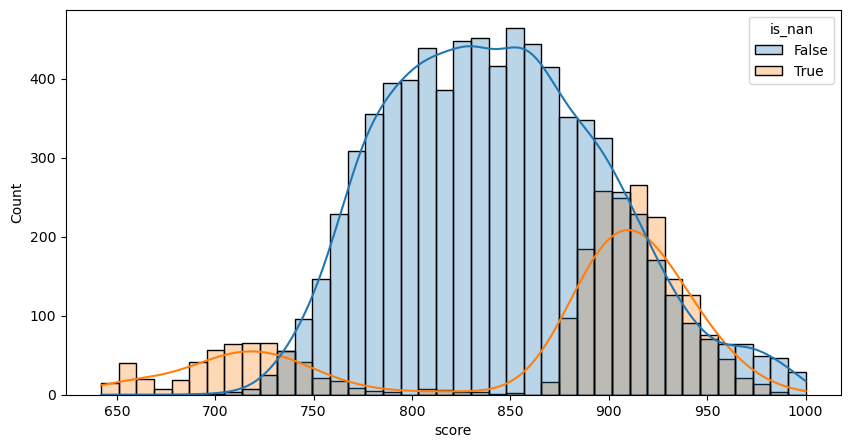

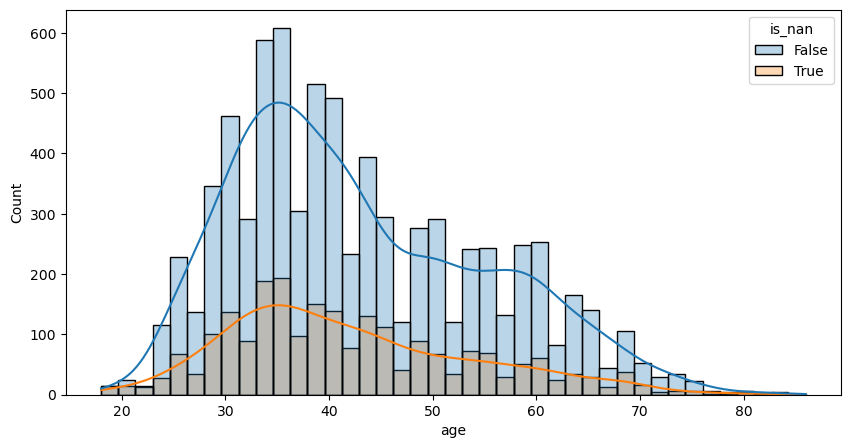

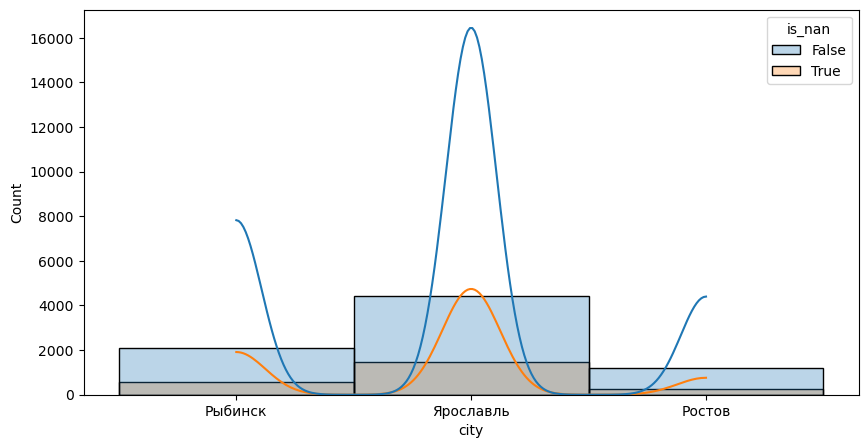

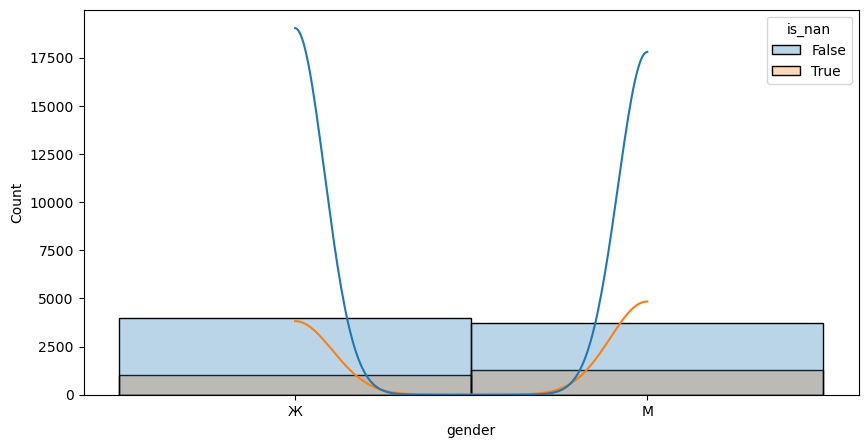

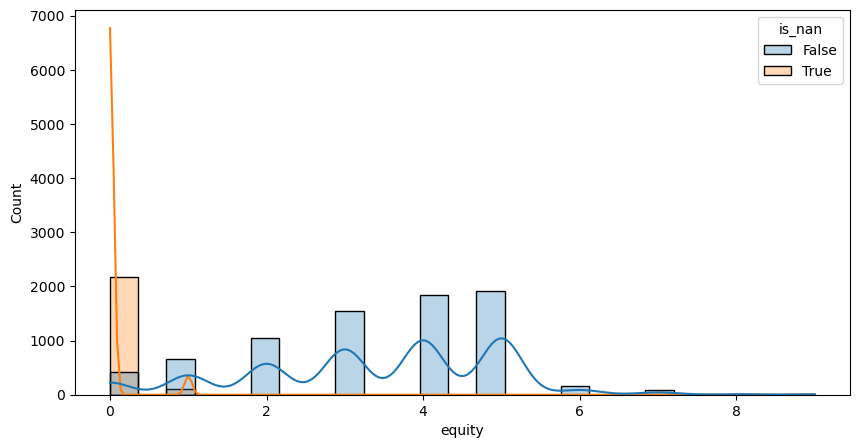

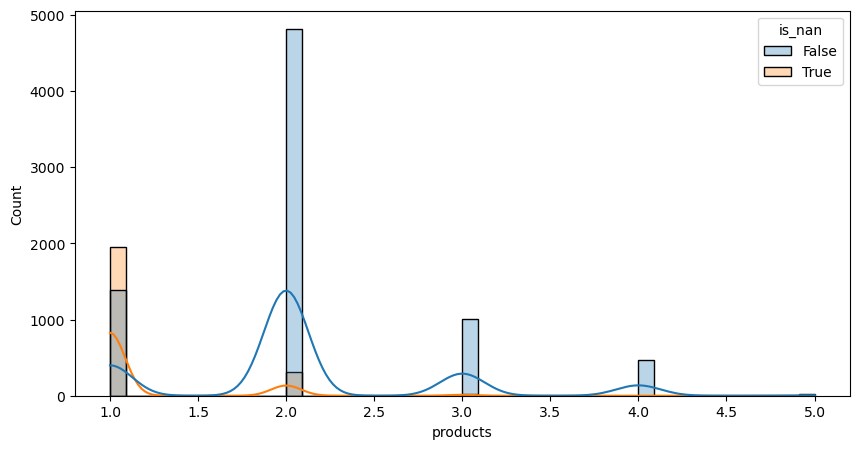

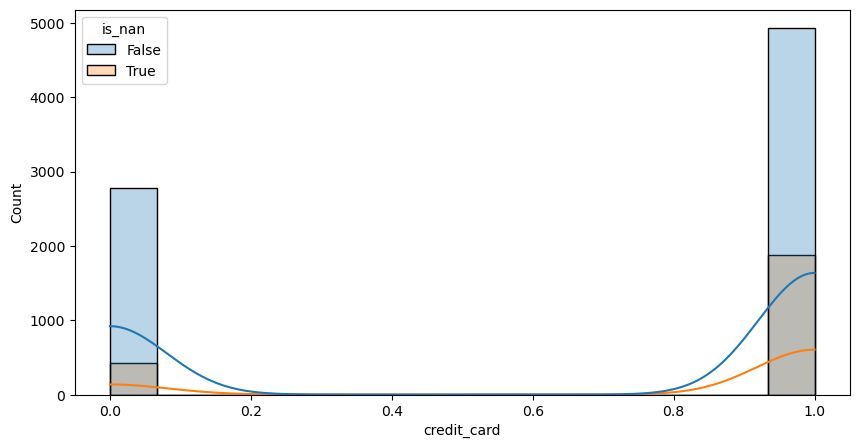

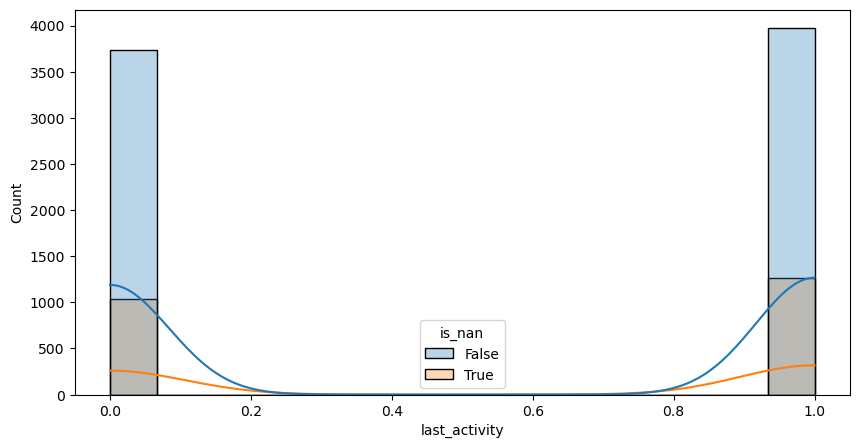

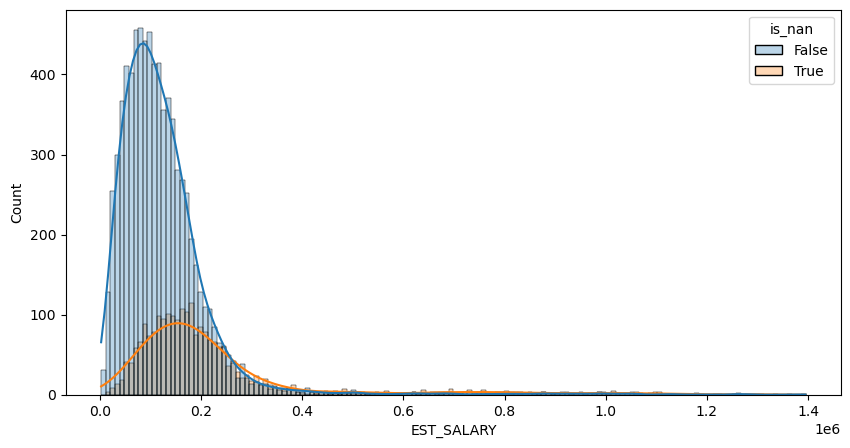

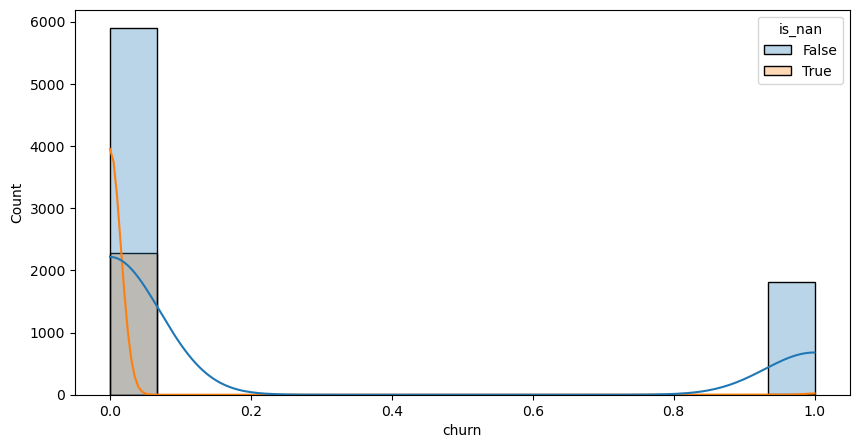

In [20]:
# В цикле построим графики по всем стобцам в разрезе пропусков

for param in df_list:
    
    plt.figure(figsize=(10, 5))
    
    sns.histplot(data=df, x=param, hue='is_nan', kde=True, alpha  = 0.3)
    plt.show()

По граифкам видно, что форма распределений расходится по столбцам score, equity, products и churn. Соответственно можно проследить взаимосвязь пропусков с данными по этим столбцам, то есть тип пропусков MNAR  (Missing Not At Random / Отсутствует не случайно). 

- По графику баллов кредитного скоринга больше всего пропусков при значениях показателя больше 867

- По графику количества баллов собственностиа больше всего пропусков при нулевом значении показателя

- По графику количества продуктов больше всего пропусков у клиентов с одним продуктом

- По графику отточности пропуски есть у лояльных клиентов


Возможно в системе произошел сбой, и клиенты с нулевым балансом дебетового счета записались как NaN. Проверим это предположение и рассмотрим наличие клиентов с нулевым балансом.

In [21]:
df.query('balance == 0').count()['score']

2

In [22]:
df.query('balance == 0')

USERID  score       city gender   age  equity  balance  products  \
3900  179831  730.0  Ярославль      М  18.0       0      0.0         2   
6757  148456  813.0  Ярославль      М  20.0       2      0.0         2   

      credit_card  last_activity  EST_SALARY  churn  is_nan  
3900            1              1    64548.33      0   False  
6757            1              0    23876.51      0   False

Как мы видим в наших данных есть клиенты с нулевым балансом, и их всего двое. Если заполнить пропуски "заглушкой" ради проверки гипотезы и проследить связь со столбцами score, equity и est_salary, то получится, целый срез клиентов, которые не имеют собственности и собственных средств, но у них высокий рейтинг и доход. Скорее всего это пользователи крединых карт или каких-то других продуктов. Заполним пропуски показанием `-100` и проверим наше предположение. Если серди клиентов не окажется тех, кто не пользуются ни одним продуктом и имеет нулевой баланс и при это не отточный, то предположение о нулевых значниях в пропусках balance верное.

In [23]:
# Создадим копию нашего датафрейма, чтобы заменять значения "заглушкой" 

df_copy = df.copy()

In [24]:
# Заполним пропуски методом fillna()

df_copy['balance'] = df_copy['balance'].fillna(-100)

df_bal = df_copy.query('balance == -100')

In [25]:
print(df_copy.query('equity == 0 and balance == -100 and credit_card == 1').groupby('products').count()['score'])

df_copy.query('equity == 0 and balance == -100 and credit_card == 0').groupby('products').count()['score']

products
1    1515
2     246
3      14
Name: score, dtype: int64


products
1    337
2     55
3     13
Name: score, dtype: int64

Таким образом мы видим, что клиенты в данных срезах пользуются одним, двумя или тремя продуктами. Соответственно мы не можем опровергнуть нашу гипотезу. И можем заполнить пропуски нулями. 

In [26]:
# Заполним пропуски методом fillna()

df['balance'] = df['balance'].fillna(0)

### Анализ типов данных

<a id="4-bullet"></a>

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         9999 non-null   int64  
 1   score          9999 non-null   float64
 2   city           9999 non-null   object 
 3   gender         9999 non-null   object 
 4   age            9973 non-null   float64
 5   equity         9999 non-null   int64  
 6   balance        9999 non-null   float64
 7   products       9999 non-null   int64  
 8   credit_card    9999 non-null   int64  
 9   last_activity  9999 non-null   int64  
 10  EST_SALARY     9999 non-null   float64
 11  churn          9999 non-null   int64  
 12  is_nan         9999 non-null   bool   
dtypes: bool(1), float64(4), int64(6), object(2)
memory usage: 1.3+ MB


Все типы данных в нашем датафрейме представлены корректно, не требуют изменений.

### Переименование и добавление столбцов

<a id="5-bullet"></a>

Некоторые названия стобцов не представлены в "змеином стиле", исправим это

In [28]:
# Переименуем столбцы методом rename()

df = df.rename(columns={'USERID':'user_id',
                       'EST_SALARY':'est_salary'})

В столбцах с городом и полом представлены неупорядоченные категориальные данные. Будет некорректно задавать им какой-то числовой порядок и смотреть средние арифметические. При рассматривании бинарных показателей, если к ним применить среднее, показывают нам долю тех клиентов, у которых этот бинарный показатель равен единице. Поэтому важно закодировать эти данные численно. 

Для того, чтобы применять среднее и смотреть корреляции какого-то числового показателя с категориальным неупорядоченным, применим one-hot кодирование при помощи pandas.get_dummies. 

Чтобы при этом не потерять оригинальный столбец, сначала сделаем его копию и используем параметр columns 

In [29]:
# Создаем копии столбцов

df['city_'] = df['city']
df['gender_'] = df['gender']

In [30]:
# Применяем метод pd.get_dummies()

df = pd.get_dummies(df, columns=['city_', 'gender_']) 

In [31]:
# Задаем отображение всех столбцов

pd.set_option('display.max_columns', None)

In [32]:
# Выводим первые 5 строк для ознакомления

df.head()

user_id  score       city gender   age  equity     balance  products  \
0   183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1   146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2   120722  892.0    Рыбинск      Ж  30.0       0        0.00         1   
3   225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4   157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  est_salary  churn  is_nan  city__Ростов  \
0            0              1    75719.14      1   False             0   
1            1              0    86621.77      0   False             0   
2            1              1   107683.34      0    True             0   
3            0              1   174423.53      1   False             0   
4            1              0    67353.16      1   False             0   

   city__Рыбинск  city__Ярославль  gender__Ж  gender__М  
0              1                0          1          0  
1              1                0          1          0  
2              1                0          1          0  
3              0                1          1          0  
4              0                1          0          1

**Вывод:**

В данном разделе мы :

- Проверили данные на дубликаты

Выяснили, что явных дубликатов нет. Присутствуют 73 дубликата по user_id, но это не одни и те же клиенты, поэтому удалять их не стали.

- Проверили наличие пропусков в данных

Пропуски есть в столбцах с возрастом и балансом. Большое кол-во пропусков в стоблце balance. Определили их тип, в соответствии с чем заменили нулями.

- Типы данных представлены корректно

- Переименовали столбцы
- Закодировали столбцы с городом и полом

## Исследовательский анализ данных

### Распределение клиентов по всем характеристикам в зависимости от оттока

<a id="6-bullet"></a>

Для того чтобы исследовать отточных и лояльных клиентов мы долдны построить графики по всем характеристикам:

- Столбчатые диаграммы для категориальных данных, а именно для столбцов `city, gender, equity, products, credit_card, last_activity`. 

- Для непрерывных переменных и переменных с большим числом уникальных значений построим гистограммы, а именно для `score, age, balance, est_salary`. 

Начнем с категориальных данных. Для оптимизации процесса создадим функцию построения графиков `graph`, которая будет строить два графика по кол-ву и по процентому соотнощению клиентов.

In [33]:
def graph(param):
    
    
    # Создаем выборку по группировке с нужным столбцом и оттоком churn, считаем кол-во и сортируем
    
    df_param = df.groupby([param, 'churn'], as_index=False)['user_id'].count()
    
    # Создаем выборку по группировке только с нужным столбцом и считаем кол-во и сортируем
    
    df_param_ch = df.groupby(param, as_index=False)['user_id'].count()
    
    # Соединяем два датафрема 
    
    df_param = df_param.merge(df_param_ch, on = param)
    
    # Переименовываем стоблцы
    
    df_param = df_param.rename(columns={'user_id_x':'user_churn',
                                        'user_id_y':'user'})
    
    # Считаем процент отточных и лояльных от общего кол-ва
    
    df_param['perc'] = round(df_param['user_churn'] / df_param['user'] * 100, 2)
    
    # назначаем размер графика
    
    plt.figure(figsize=(13, 5))

    # строим столбчатый график средствами seaborn
    sns.barplot(data=df_param, x=param, y='user_churn', hue='churn', palette='bright')

    # формируем заголовок графика и подписи осей средствами matplotlib
    
    plt.title('График распределения клиентов по {} в разрезе оттока'.format(param))
    
    plt.show()
    
    # Создаем датафрейм с процентами 
    
    df_param_perc = df_param.reset_index(drop=True)

    # строим столбчатый график с помощью plotly по созданному датафрейму
    
    fig = px.bar(df_param_perc, x=param, y='perc', color='churn',
        title='График процентного соотношения отточных и лояльных клиентов по {}'.format(param))

    fig.show() 

Теперь вызовем функцию в цикле для нужных столбцов

Параметр: city


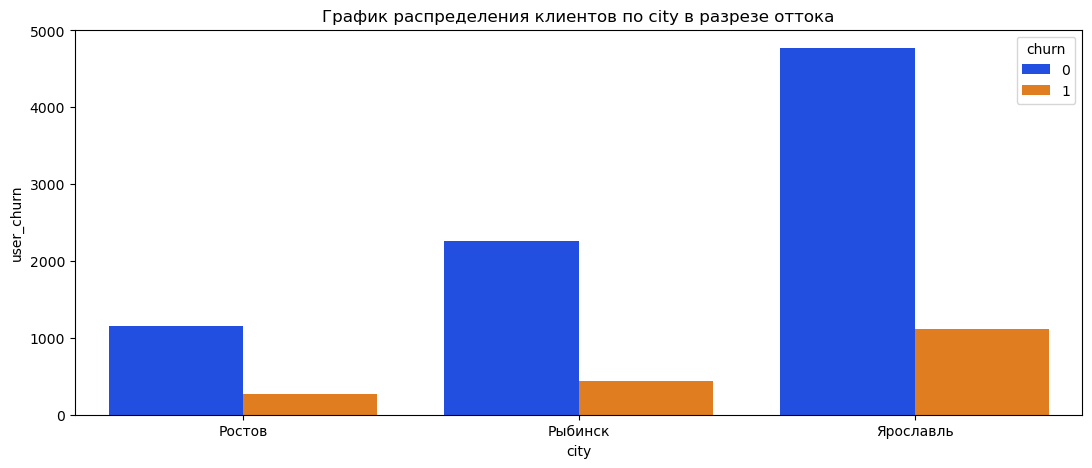

Параметр: gender


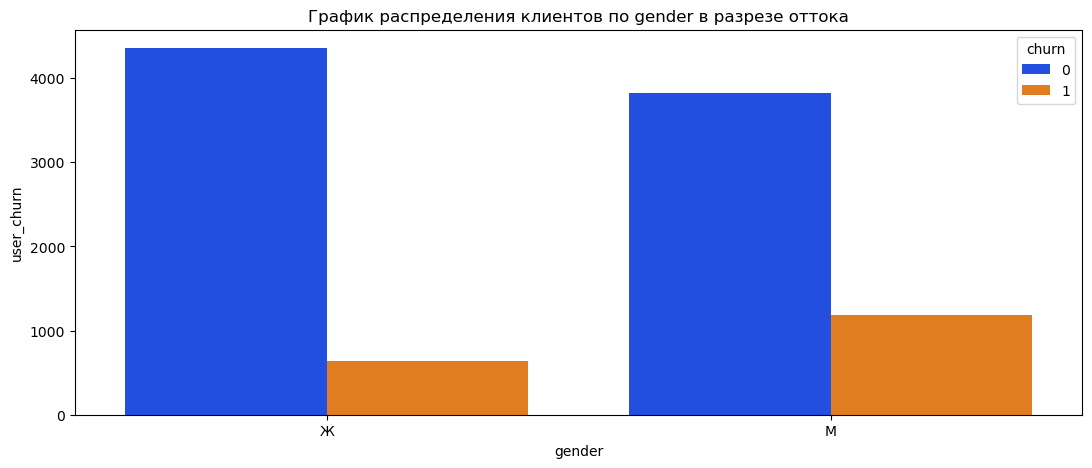

Параметр: equity


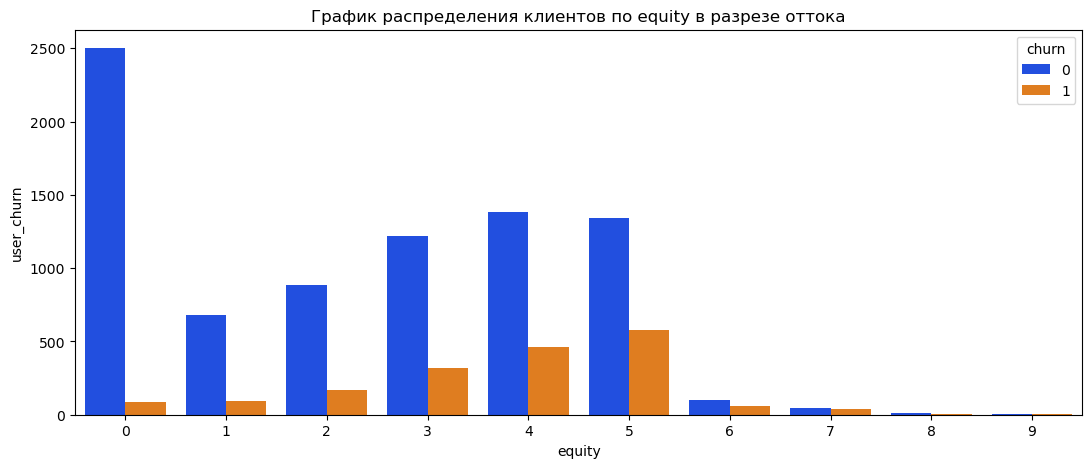

Параметр: products


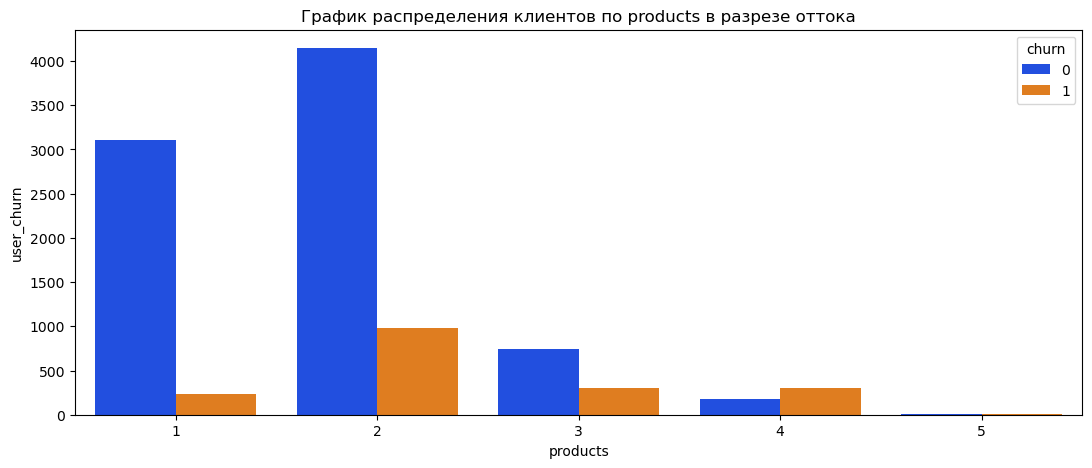

Параметр: credit_card


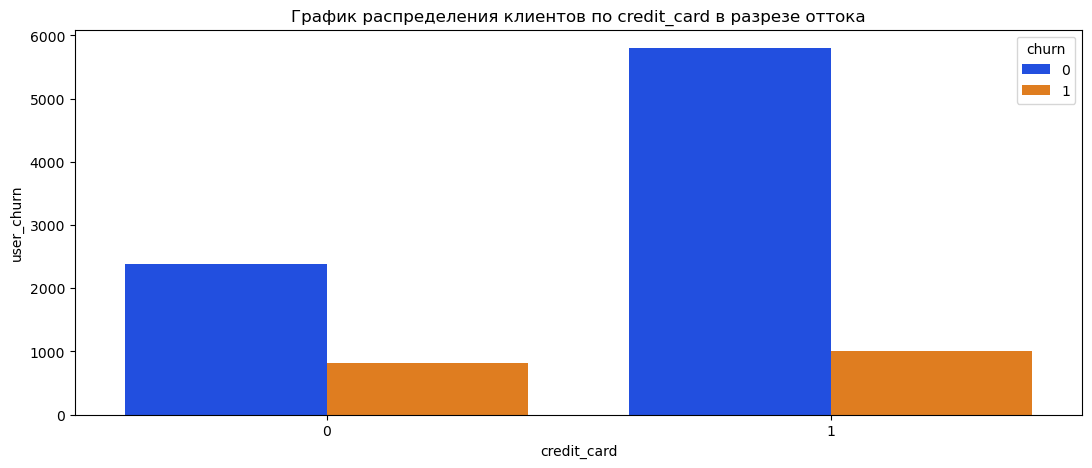

Параметр: last_activity


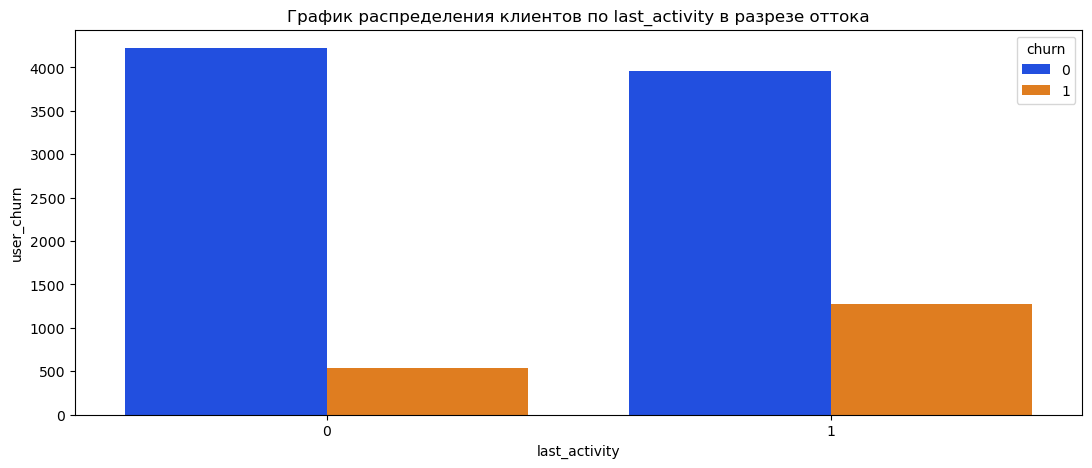

In [34]:
for p in ['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity']:
    print('Параметр: {}'.format(p))
    graph(p)

Теперь обратимся к непрерывным данным. Для оптимизации процесса создадим функцию построения графиков `graph_hist`, которая будет строить два графика по кол-ву и по процентому соотнощению клиентов.

In [35]:
def graph_hist(param, df):
    
    plt.figure(figsize=(10, 5))

    sns.histplot(data=df, x=param, hue='churn', bins=50, kde=True, alpha  = 0.3, stat="density", common_norm=False)

    # формируем заголовок графика и подписи осей средствами matplotlib
    
    plt.title('График распределения клиентов по {} в разрезе оттока'.format(param))
    
    plt.show()

Теперь вызовем функцию в цикле для нужных столбцов

Параметр: score


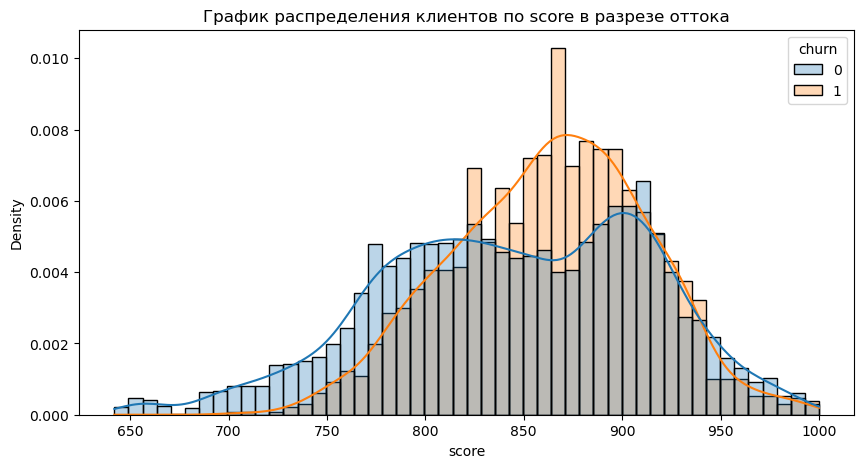

Параметр: balance


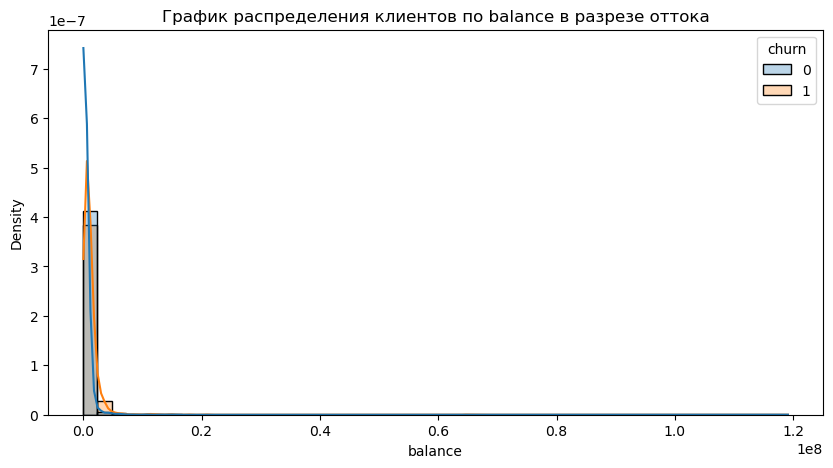

Параметр: age


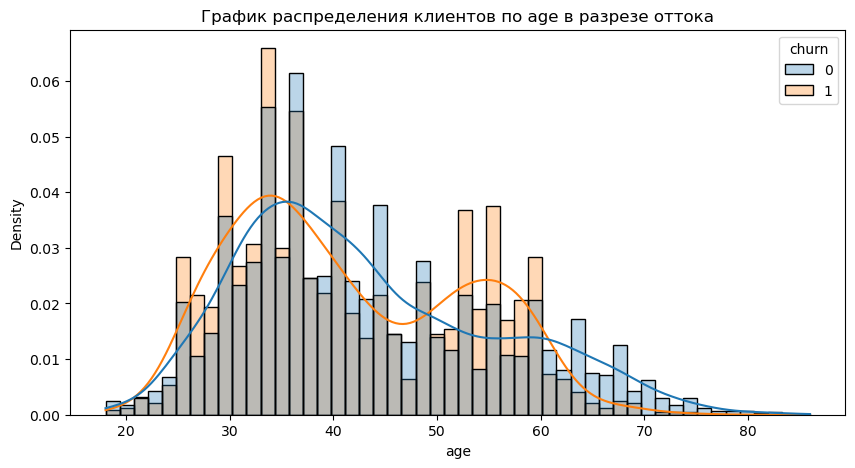

Параметр: est_salary


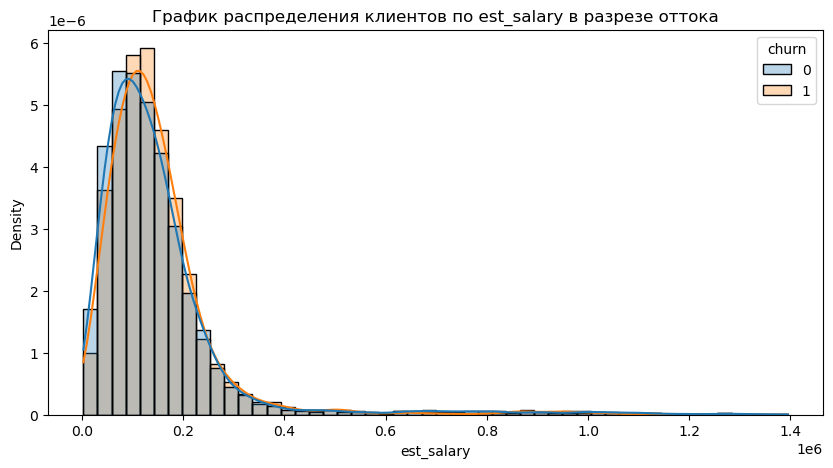

In [36]:
for p in ['score', 'balance', 'age', 'est_salary']:
    print('Параметр: {}'.format(p))
    graph_hist(p, df)

Как видно из графиков по столбцам с балансом и заработной платой клиентов сложно делать выводы из-за наличия выбросов, поэтому необходимо сделать срез. Для начала найдем 95ые процентили этих столбцов.

In [37]:
# Найдем 95ые процентили методом quantile()

df[['balance','est_salary']].quantile(.95)

balance       1839014.176
est_salary     316885.609
Name: 0.95, dtype: float64

In [38]:
# создадим выборку по найденным значениям мтеодом query()

df_hist = df.query('balance < 1840000 and est_salary < 316900')

Параметр: balance


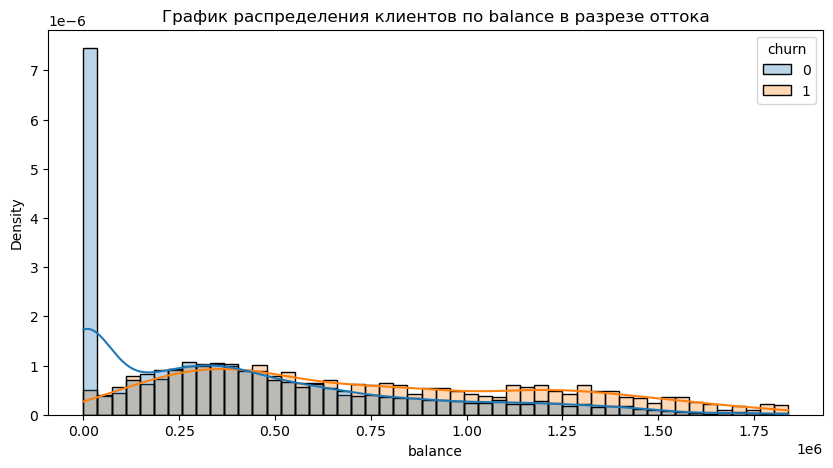

Параметр: est_salary


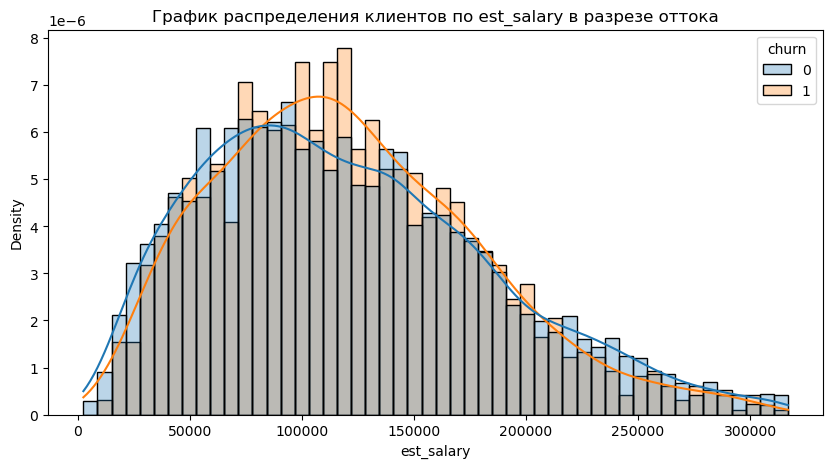

In [39]:
# Вызовем заново нашу функцию для новых выборок

for p in ['balance', 'est_salary']:
    print('Параметр: {}'.format(p))
    graph_hist(p, df_hist)

**Вывод:**

По построенным графикам можно составить начальные портреты лояльного и отточного клиентов

Портрет лояльного клиента:

- Пол: женский (процент отточности 12.75%)
- количество баллов собственности: < 5
- количество продуктов, которыми пользуется клиент: 1, 2, 3
- Наличие кредитной карты: да (процент отточности 14.74%)
- активность клиента за последний месяц: нет (процент отточности 11.37%)
- возраст: от 18 до 23 и от 30 до 50 и больше 60
- баланс на счете: < 750 000
- заработная плата: < 100 000
- баллы кредитного скоринга: до 821 и от 940

Портрет отточного клиента:

- Пол: мужской (процент отточности 23.64%)
- количество баллов собственности: >= 5
- количество продуктов, которыми пользуется клиент: 4, 5
- Наличие кредитной карты: нет (процент отточности 25.56%)
- активность клиента за последний месяц: да (процент отточности 24.41%)
- возраст: от 24 до 29 и от 50 до 60 
- баланс на счете: >= 750 000
- заработная плата: >= 100 000
- баллы кредитного скоринга: от 821 до 940

### Составление портретов отточных и лояльных клиентов

<a id="7-bullet"></a>

Для составления полноценных портретов отточных и лояльных клиентов и сравнения их сформируем два датафрейма по столбцу отточности `churn`

In [40]:
# Используем метод query()

df_churn = df.query('churn == 1')
df_loyalty = df.query('churn == 0')

In [41]:
# Посмотрим надетальныю информацию по новому датафрейму

df_churn.describe().T

count          mean           std       min         25%  \
user_id          1819.0  1.709751e+05  3.529515e+04  94561.00  141300.000   
score            1819.0  8.633469e+02  4.957121e+01    706.00     828.000   
age              1818.0  4.142959e+01  1.114475e+01     18.00      32.000   
equity           1819.0  3.764156e+00  1.586144e+00      0.00       3.000   
balance          1819.0  1.126512e+06  2.029333e+06      0.00  381511.330   
products         1819.0  2.377130e+00  9.219511e-01      1.00       2.000   
credit_card      1819.0  5.514019e-01  4.974876e-01      0.00       0.000   
last_activity    1819.0  7.025838e-01  4.572469e-01      0.00       0.000   
est_salary       1819.0  1.483107e+05  1.229143e+05  10880.27   83196.615   
churn            1819.0  1.000000e+00  0.000000e+00      1.00       1.000   
city__Ростов     1819.0  1.462342e-01  3.534380e-01      0.00       0.000   
city__Рыбинск    1819.0  2.396921e-01  4.270129e-01      0.00       0.000   
city__Ярославль  1819.0  6.140737e-01  4.869472e-01      0.00       0.000   
gender__Ж        1819.0  3.496427e-01  4.769882e-01      0.00       0.000   
gender__М        1819.0  6.503573e-01  4.769882e-01      0.00       0.000   

                       50%          75%          max  
user_id          170532.00   201399.500    229058.00  
score               866.00      898.000      1000.00  
age                  39.00       52.000        75.00  
equity                4.00        5.000         9.00  
balance          775365.19  1347228.075  64866210.15  
products              2.00        3.000         5.00  
credit_card           1.00        1.000         1.00  
last_activity         1.00        1.000         1.00  
est_salary       125395.22   175985.385   1263028.49  
churn                 1.00        1.000         1.00  
city__Ростов          0.00        0.000         1.00  
city__Рыбинск         0.00        0.000         1.00  
city__Ярославль       1.00        1.000         1.00  
gender__Ж             0.00        1.000         1.00  
gender__М             1.00        1.000         1.00

In [42]:
# Посмотрим надетальныю информацию по новому датафрейму

df_loyalty.describe().T

count           mean           std      min          25%  \
user_id          8180.0  172004.359046  3.334547e+04  95384.0  143105.5000   
score            8180.0     845.428362  6.804772e+01    642.0     796.0000   
age              8155.0      43.020846  1.237521e+01     18.0      34.0000   
equity           8180.0       2.374817  1.971394e+00      0.0       0.0000   
balance          8180.0  529221.184615  1.691989e+06      0.0       0.0000   
products         8180.0       1.757579  7.133712e-01      1.0       1.0000   
credit_card      8180.0       0.709169  4.541736e-01      0.0       0.0000   
last_activity    8180.0       0.483741  4.997661e-01      0.0       0.0000   
est_salary       8180.0  147783.200108  1.428024e+05   2546.3   73506.1525   
churn            8180.0       0.000000  0.000000e+00      0.0       0.0000   
city__Ростов     8180.0       0.140709  3.477424e-01      0.0       0.0000   
city__Рыбинск    8180.0       0.276039  4.470637e-01      0.0       0.0000   
city__Ярославль  8180.0       0.583252  4.930506e-01      0.0       0.0000   
gender__Ж        8180.0       0.532763  4.989559e-01      0.0       0.0000   
gender__М        8180.0       0.467237  4.989559e-01      0.0       0.0000   

                        50%         75%           max  
user_id          173218.000  201260.250  2.291450e+05  
score               848.000     900.000  1.000000e+03  
age                  40.000      51.000  8.600000e+01  
equity                3.000       4.000  9.000000e+00  
balance          320687.930  664632.950  1.191136e+08  
products              2.000       2.000  5.000000e+00  
credit_card           1.000       1.000  1.000000e+00  
last_activity         0.000       1.000  1.000000e+00  
est_salary       118257.715  173990.125  1.395064e+06  
churn                 0.000       0.000  0.000000e+00  
city__Ростов          0.000       0.000  1.000000e+00  
city__Рыбинск         0.000       1.000  1.000000e+00  
city__Ярославль       1.000       1.000  1.000000e+00  
gender__Ж             1.000       1.000  1.000000e+00  
gender__М             0.000       1.000  1.000000e+00

In [43]:
# Создадим новый датафрейм с расчитанными по всем стоблцам средним и медианой

df_l = df_loyalty.agg({'mean', 'median'}).T
df_l = df_l.reset_index()

In [44]:
# Создадим новый датафрейм с расчитанными по всем стоблцам средним и медианой

df_c = df_churn.agg({'mean', 'median'}).T
df_c = df_c.reset_index()

In [45]:
# Соединим данные по инлексу и сделаем соотвествуюзие суффиксы

df_merge = df_l.merge(df_c, on='index', suffixes=('_loyalty', '_churn'))

In [46]:
# Посчитаем процент значений лояльных по отношению к отточным клиентам, для этого создадим новые столбцы

df_merge['perc_mean'] = round((1 - df_merge['mean_loyalty'] / df_merge['mean_churn']) * 100, 2)
df_merge['perc_median'] = round((1 - df_merge['median_loyalty'] / df_merge['median_churn']) * 100, 2)

df_merge

index  median_loyalty   mean_loyalty  median_churn  \
0           user_id      173218.000  172004.359046     170532.00   
1             score         848.000     845.428362        866.00   
2               age          40.000      43.020846         39.00   
3            equity           3.000       2.374817          4.00   
4           balance      320687.930  529221.184615     775365.19   
5          products           2.000       1.757579          2.00   
6       credit_card           1.000       0.709169          1.00   
7     last_activity           0.000       0.483741          1.00   
8        est_salary      118257.715  147783.200108     125395.22   
9             churn           0.000       0.000000          1.00   
10           is_nan           0.000       0.278973          0.00   
11     city__Ростов           0.000       0.140709          0.00   
12    city__Рыбинск           0.000       0.276039          0.00   
13  city__Ярославль           1.000       0.583252          1.00   
14        gender__Ж           1.000       0.532763          0.00   
15        gender__М           0.000       0.467237          1.00   

      mean_churn  perc_mean  perc_median  
0   1.709751e+05      -0.60        -1.58  
1   8.633469e+02       2.08         2.08  
2   4.142959e+01      -3.84        -2.56  
3   3.764156e+00      36.91        25.00  
4   1.126512e+06      53.02        58.64  
5   2.377130e+00      26.06         0.00  
6   5.514019e-01     -28.61         0.00  
7   7.025838e-01      31.15       100.00  
8   1.483107e+05       0.36         5.69  
9   1.000000e+00     100.00       100.00  
10  6.597031e-03   -4128.77          NaN  
11  1.462342e-01       3.78          NaN  
12  2.396921e-01     -15.16          NaN  
13  6.140737e-01       5.02         0.00  
14  3.496427e-01     -52.37         -inf  
15  6.503573e-01      28.16       100.00

In [47]:
df_merge = df_merge.drop(labels=[0,9, 10, 15], axis=0)
df_merge

index  median_loyalty   mean_loyalty  median_churn  \
1             score         848.000     845.428362        866.00   
2               age          40.000      43.020846         39.00   
3            equity           3.000       2.374817          4.00   
4           balance      320687.930  529221.184615     775365.19   
5          products           2.000       1.757579          2.00   
6       credit_card           1.000       0.709169          1.00   
7     last_activity           0.000       0.483741          1.00   
8        est_salary      118257.715  147783.200108     125395.22   
11     city__Ростов           0.000       0.140709          0.00   
12    city__Рыбинск           0.000       0.276039          0.00   
13  city__Ярославль           1.000       0.583252          1.00   
14        gender__Ж           1.000       0.532763          0.00   

      mean_churn  perc_mean  perc_median  
1   8.633469e+02       2.08         2.08  
2   4.142959e+01      -3.84        -2.56  
3   3.764156e+00      36.91        25.00  
4   1.126512e+06      53.02        58.64  
5   2.377130e+00      26.06         0.00  
6   5.514019e-01     -28.61         0.00  
7   7.025838e-01      31.15       100.00  
8   1.483107e+05       0.36         5.69  
11  1.462342e-01       3.78          NaN  
12  2.396921e-01     -15.16          NaN  
13  6.140737e-01       5.02         0.00  
14  3.496427e-01     -52.37         -inf

Построим график по проценту от среднего, по которму будем смотреть на  кол-ые переменые `'equity', 'products', 'credit_card', 'last_activity' 'city__Ростов' 'city__Рыбинск' 'city__Ярославль' 'gender__Ж' 'gender__М'`

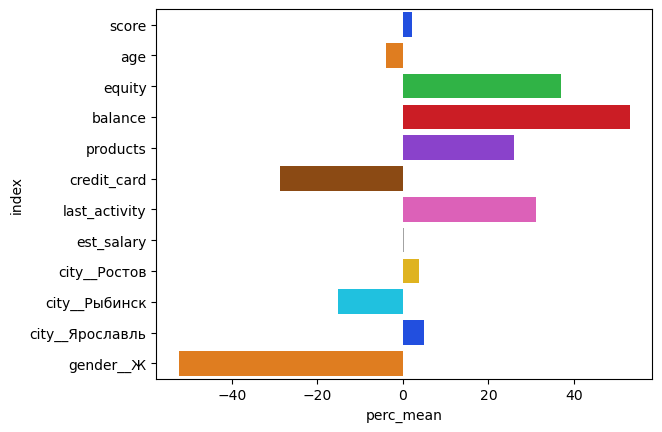

In [48]:
sns.barplot(data=df_merge, y='index', x='perc_mean', palette='bright');

Построим график по проценту от медианы, по которму будем смотреть на `'score', 'balance', 'age', 'est_salary'`

In [49]:
# Для этого оставим только необходимые данные 

df_merge_median = df_merge.drop(labels=[5, 6, 7, 11, 12, 13, 14], axis=0)

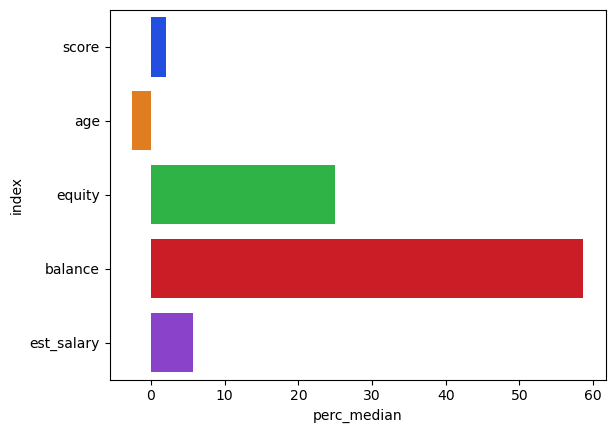

In [50]:
sns.barplot(data=df_merge_median, y='index', x='perc_median', palette='bright');

Теперь мы можем провести сравнение портретов лояльных клиентов по отношению к отточным:

- баллы кредитного скоринга: меньше на 2%
- возраст: больше на 2.5%
- количество баллов собственности: меньше на 37%
- баланс на счете: меньше на 59%
- количество продуктов, которыми пользуется клиент: меньше на 26%
- Наличие кредитной карты: больше на 29%
- активность клиента за последний месяц: меньше на 31%
- доход: меньше на 6%
- город Ростов: меньше на 4%
- город Рыбинск: больше на 15%
- город Ярославль: меньше на 5%
- мужчины: меньше на 28%
- женщины: больше на 52%

### Составление бизнес-метрики 

<a id="8-bullet"></a>

Для составления бизнес-метрики будем опираться на следующие характеристики:

- баллы кредитного скоринга
- заработная плата
- баланс на счете
- наличие кредитной карты
- количество продуктов, которыми пользуется клиент
- количество баллов собственности

Наша бизнес-метрика будет новым столбцом с численным показателем, в которой мы будем суммировать некоторые параметры. Для выявления которых необходимо произвести категоризацию данных. 

Начем с баланса, категории клиентов будем определять по данным описательной статистики (min, 25%, 50%, 75%, max)

In [51]:
# Испольхуем метод describe().T

df.describe().T

count           mean           std      min         25%  \
user_id          9999.0  171817.110611  3.370907e+04  94561.0  142809.500   
score            9999.0     848.688069  6.544198e+01    642.0     802.000   
age              9973.0      42.730773  1.217517e+01     18.0      33.000   
equity           9999.0       2.627563  1.980931e+00      0.0       0.000   
balance          9999.0  637879.301096  1.773107e+06      0.0   61064.395   
products         9999.0       1.870287  7.924657e-01      1.0       1.000   
credit_card      9999.0       0.680468  4.663186e-01      0.0       0.000   
last_activity    9999.0       0.523552  4.994700e-01      0.0       0.000   
est_salary       9999.0  147879.167065  1.393901e+05   2546.3   75252.125   
churn            9999.0       0.181918  3.857964e-01      0.0       0.000   
city__Ростов     9999.0       0.141714  3.487742e-01      0.0       0.000   
city__Рыбинск    9999.0       0.269427  4.436843e-01      0.0       0.000   
city__Ярославль  9999.0       0.588859  4.920654e-01      0.0       0.000   
gender__Ж        9999.0       0.499450  5.000247e-01      0.0       0.000   
gender__М        9999.0       0.500550  5.000247e-01      0.0       0.000   

                       50%         75%           max  
user_id          172740.00  201262.500  2.291450e+05  
score               853.00     900.000  1.000000e+03  
age                  40.00      51.000  8.600000e+01  
equity                3.00       4.000  9.000000e+00  
balance          375946.64  802786.230  1.191136e+08  
products              2.00       2.000  5.000000e+00  
credit_card           1.00       1.000  1.000000e+00  
last_activity         1.00       1.000  1.000000e+00  
est_salary       119661.51  174501.125  1.395064e+06  
churn                 0.00       0.000  1.000000e+00  
city__Ростов          0.00       0.000  1.000000e+00  
city__Рыбинск         0.00       1.000  1.000000e+00  
city__Ярославль       1.00       1.000  1.000000e+00  
gender__Ж             0.00       1.000  1.000000e+00  
gender__М             1.00       1.000  1.000000e+00

Для категоризации задаем функцию `categorize_balance`

In [52]:
def categorize_balance(blnc):
    try:
        if 0 <= blnc <= 295554.16:
            return 4
        elif 295554.16 < blnc <= 524272.200:
            return 3
        elif 524272.200 < blnc <= 980705.8500:
            return 2
        elif blnc > 980705:
            return 1
    except:
        pass

In [53]:
# Применим функцию к balance

df['balance_m'] = df['balance'].apply(categorize_balance)

df.head()

user_id  score       city gender   age  equity     balance  products  \
0   183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1   146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2   120722  892.0    Рыбинск      Ж  30.0       0        0.00         1   
3   225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4   157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  est_salary  churn  is_nan  city__Ростов  \
0            0              1    75719.14      1   False             0   
1            1              0    86621.77      0   False             0   
2            1              1   107683.34      0    True             0   
3            0              1   174423.53      1   False             0   
4            1              0    67353.16      1   False             0   

   city__Рыбинск  city__Ярославль  gender__Ж  gender__М  balance_m  
0              1                0          1          0          4  
1              1                0          1          0          2  
2              1                0          1          0          4  
3              0                1          1          0          1  
4              0                1          0          1          4

Для категоризации по заработной плате задаем функцию `categorize_est_salary`

In [54]:
def categorize_est_salary(est):
    try:
        if 0 <= est <= 75251.90:
            return 3
        elif 75251.90 < est <= 119658.105:
            return 2
        elif est > 119658.105:
            return 1
    except:
        pass

In [55]:
df['est_salary_m'] = df['est_salary'].apply(categorize_est_salary)

df.head()

user_id  score       city gender   age  equity     balance  products  \
0   183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1   146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2   120722  892.0    Рыбинск      Ж  30.0       0        0.00         1   
3   225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4   157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  est_salary  churn  is_nan  city__Ростов  \
0            0              1    75719.14      1   False             0   
1            1              0    86621.77      0   False             0   
2            1              1   107683.34      0    True             0   
3            0              1   174423.53      1   False             0   
4            1              0    67353.16      1   False             0   

   city__Рыбинск  city__Ярославль  gender__Ж  gender__М  balance_m  \
0              1                0          1          0          4   
1              1                0          1          0          2   
2              1                0          1          0          4   
3              0                1          1          0          1   
4              0                1          0          1          4   

   est_salary_m  
0             2  
1             2  
2             2  
3             1  
4             3

Для категоризации по кол-ву продуктов задаем функцию `categorize_products`

In [56]:
def categorize_products(products):
    try:
        if 1 <= products <= 3:
            return 3
        elif 3 < products <= 5:
            return 1
    except:
        pass

In [57]:
df['products_m'] = df['products'].apply(categorize_products)

df.head()

user_id  score       city gender   age  equity     balance  products  \
0   183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1   146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2   120722  892.0    Рыбинск      Ж  30.0       0        0.00         1   
3   225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4   157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  est_salary  churn  is_nan  city__Ростов  \
0            0              1    75719.14      1   False             0   
1            1              0    86621.77      0   False             0   
2            1              1   107683.34      0    True             0   
3            0              1   174423.53      1   False             0   
4            1              0    67353.16      1   False             0   

   city__Рыбинск  city__Ярославль  gender__Ж  gender__М  balance_m  \
0              1                0          1          0          4   
1              1                0          1          0          2   
2              1                0          1          0          4   
3              0                1          1          0          1   
4              0                1          0          1          4   

   est_salary_m  products_m  
0             2           3  
1             2           3  
2             2           3  
3             1           3  
4             3           3

Для категоризации по кол-ву баллов собственности задаем функцию `categorize_equity`

In [58]:
def categorize_equity(eq):
    try:
        if 0 <= eq <= 5:
            return 3
        elif 5 < eq:
            return 1
    except:
        pass

In [59]:
df['equity_m'] = df['equity'].apply(categorize_equity)

df.head()

user_id  score       city gender   age  equity     balance  products  \
0   183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1   146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2   120722  892.0    Рыбинск      Ж  30.0       0        0.00         1   
3   225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4   157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  est_salary  churn  is_nan  city__Ростов  \
0            0              1    75719.14      1   False             0   
1            1              0    86621.77      0   False             0   
2            1              1   107683.34      0    True             0   
3            0              1   174423.53      1   False             0   
4            1              0    67353.16      1   False             0   

   city__Рыбинск  city__Ярославль  gender__Ж  gender__М  balance_m  \
0              1                0          1          0          4   
1              1                0          1          0          2   
2              1                0          1          0          4   
3              0                1          1          0          1   
4              0                1          0          1          4   

   est_salary_m  products_m  equity_m  
0             2           3         3  
1             2           3         3  
2             2           3         3  
3             1           3         3  
4             3           3         3

Все категории созданы, теперь создаем нашу бизнес-метрику `metrics`, в которой суммируем новые столбцы, а также передаем значения столбца баллов кредитного скоринга, деленные на 100, столбца с наличием кредитки + 3

In [60]:
df['metrics'] = df['score'] / 100 + (df['credit_card'] + 3) + df['balance_m'] + df['est_salary_m'] \
+ df['products_m'] + df['equity_m']

In [61]:
df.head()

user_id  score       city gender   age  equity     balance  products  \
0   183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1   146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2   120722  892.0    Рыбинск      Ж  30.0       0        0.00         1   
3   225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4   157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  est_salary  churn  is_nan  city__Ростов  \
0            0              1    75719.14      1   False             0   
1            1              0    86621.77      0   False             0   
2            1              1   107683.34      0    True             0   
3            0              1   174423.53      1   False             0   
4            1              0    67353.16      1   False             0   

   city__Рыбинск  city__Ярославль  gender__Ж  gender__М  balance_m  \
0              1                0          1          0          4   
1              1                0          1          0          2   
2              1                0          1          0          4   
3              0                1          1          0          1   
4              0                1          0          1          4   

   est_salary_m  products_m  equity_m  metrics  
0             2           3         3    23.50  
1             2           3         3    22.61  
2             2           3         3    24.92  
3             1           3         3    19.66  
4             3           3         3    24.30

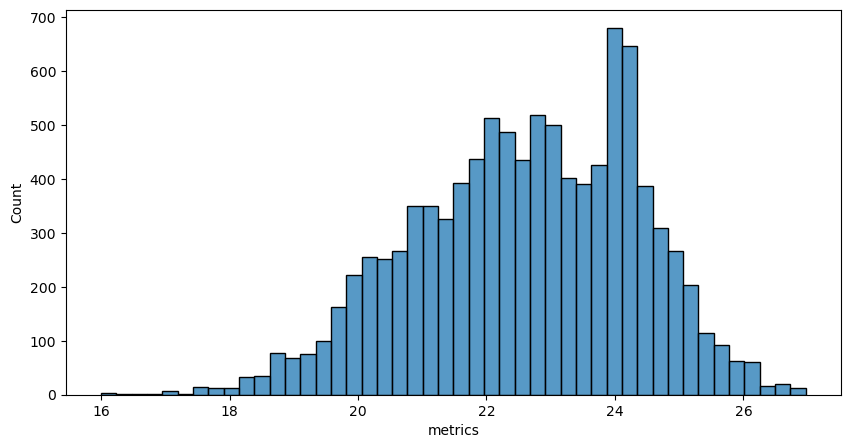

In [62]:
# Построим распределение метрики

plt.figure(figsize=(10, 5))

sns.histplot(data=df, x='metrics');

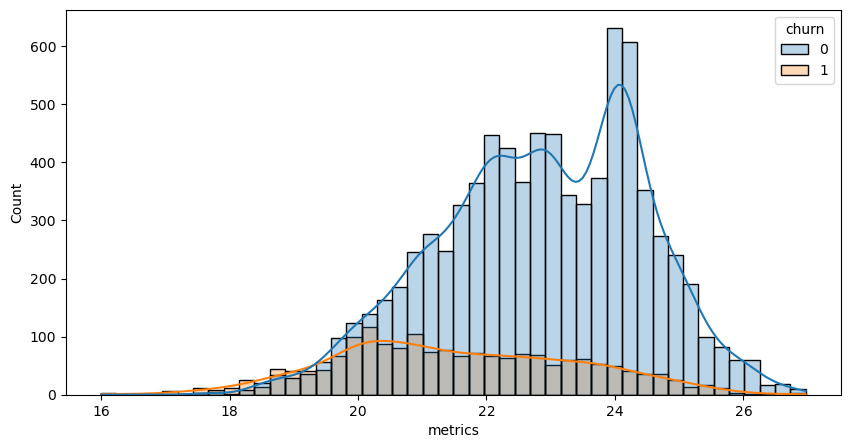

In [63]:
# Построим распределение метрики в разрезе оттока

plt.figure(figsize=(10, 5))

sns.histplot(data=df, x='metrics', hue='churn', kde=True, alpha  = 0.3);

In [64]:
df['metrics'].describe()

count    9999.000000
mean       22.608693
std         1.728951
min        16.000000
25%        21.400000
50%        22.740000
75%        23.990000
max        26.970000
Name: metrics, dtype: float64

Значения нашей метрики распределяются от 16 до 27, то есть интервал 11 

Также можно заметить по графику в разрезе отточности, что кол-во оттточных клиентов уменьшается с увеличением значений ценности по бизнес-метрике.

### Корреляционный анализ

<a id="9-bullet"></a>

Для корреляционного анализа удалим ненужные столбцы

In [65]:
# удаляем ненужные столбцы мтеодом drop()

df_corr = df.drop(labels=['user_id', 'city', 'gender', 'is_nan', 'balance_m', 'est_salary_m', 'products_m', \
                          'equity_m'], axis=1)

In [66]:
# Строим корреляционную матрицу методом corr() и сортируем по оттоку 

df_corrr = df_corr.corr().sort_values('churn', ascending=False)
df_corrr

score       age    equity   balance  products  \
churn            0.105634 -0.050463  0.270581  0.129960  0.301616   
products        -0.003708  0.017900  0.432235  0.157907  1.000000   
equity           0.064103  0.020581  1.000000  0.252395  0.432235   
last_activity   -0.031004 -0.007849 -0.001950  0.015928  0.036905   
gender__М        0.012429 -0.212628 -0.021604  0.031995 -0.022916   
balance          0.144407  0.066139  0.252395  1.000000  0.157907   
score            1.000000 -0.012339  0.064103  0.144407 -0.003708   
city__Ярославль  0.027180 -0.059549 -0.020634  0.038583  0.042515   
city__Ростов    -0.037572  0.047128  0.036300 -0.019784 -0.006223   
est_salary       0.164049 -0.039354 -0.171965  0.159156 -0.118299   
city__Рыбинск   -0.000609  0.028978 -0.005651 -0.027239 -0.042259   
age             -0.012339  1.000000  0.020581  0.066139  0.017900   
credit_card     -0.094503 -0.122761 -0.167497 -0.083640 -0.251831   
gender__Ж       -0.012429  0.212628  0.021604 -0.031995  0.022916   
metrics          0.129190 -0.092106 -0.521823 -0.280433 -0.458385   

                 credit_card  last_activity  est_salary     churn  \
churn              -0.130524       0.169037    0.001460  1.000000   
products           -0.251831       0.036905   -0.118299  0.301616   
equity             -0.167497      -0.001950   -0.171965  0.270581   
last_activity      -0.033603       1.000000    0.002947  0.169037   
gender__М           0.126223      -0.013768    0.082295  0.141287   
balance            -0.083640       0.015928    0.159156  0.129960   
score              -0.094503      -0.031004    0.164049  0.105634   
city__Ярославль     0.114816      -0.049111    0.126870  0.024165   
city__Ростов       -0.098534       0.006962   -0.106101  0.006112   
est_salary          0.035432       0.002947    1.000000  0.001460   
city__Рыбинск      -0.049880       0.048993   -0.057300 -0.031605   
age                -0.122761      -0.007849   -0.039354 -0.050463   
credit_card         1.000000      -0.033603    0.035432 -0.130524   
gender__Ж          -0.126223       0.013768   -0.082295 -0.141287   
metrics             0.369176      -0.046446   -0.174853 -0.295241   

                 city__Ростов  city__Рыбинск  city__Ярославль  gender__Ж  \
churn                0.006112      -0.031605         0.024165  -0.141287   
products            -0.006223      -0.042259         0.042515   0.022916   
equity               0.036300      -0.005651        -0.020634   0.021604   
last_activity        0.006962       0.048993        -0.049111   0.013768   
gender__М           -0.015072      -0.015997         0.025107  -1.000000   
balance             -0.019784      -0.027239         0.038583  -0.031995   
score               -0.037572      -0.000609         0.027180  -0.012429   
city__Ярославль     -0.486296      -0.726773         1.000000  -0.025107   
city__Ростов         1.000000      -0.246763        -0.486296   0.015072   
est_salary          -0.106101      -0.057300         0.126870  -0.082295   
city__Рыбинск       -0.246763       1.000000        -0.726773   0.015997   
age                  0.047128       0.028978        -0.059549   0.212628   
credit_card         -0.098534      -0.049880         0.114816  -0.126223   
gender__Ж            0.015072       0.015997        -0.025107   1.000000   
metrics             -0.002877       0.021653        -0.017485   0.013190   

                 gender__М   metrics  
churn             0.141287 -0.295241  
products         -0.022916 -0.458385  
equity           -0.021604 -0.521823  
last_activity    -0.013768 -0.046446  
gender__М         1.000000 -0.013190  
balance           0.031995 -0.280433  
score             0.012429  0.129190  
city__Ярославль   0.025107 -0.017485  
city__Ростов     -0.015072 -0.002877  
est_salary        0.082295 -0.174853  
city__Рыбинск    -0.015997  0.021653  
age              -0.212628 -0.092106  
credit_card       0.126223  0.369176  
gender__Ж        -1.000000  0.013190  
metrics 

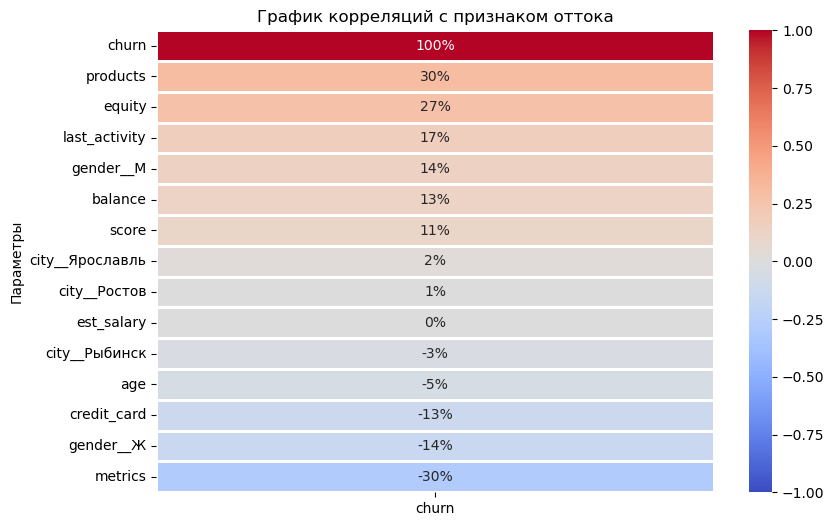

In [67]:
# Строим тепловую карту по корреляционную матрицу только по показателю оттока

plt.figure(figsize=(9, 6))

sns.heatmap(df_corrr[['churn']], annot = True, fmt='.0%', vmin=-1, vmax=1, center= 0,\
            cmap= 'coolwarm', linewidths=1)

plt.title('График корреляций с признаком оттока')
plt.ylabel('Параметры');

Для улавливания даже нелинейных зависимостей построим также матрицу корреляций phic 

In [68]:
phik_overview = df_corr.phik_matrix()
phik_overview = phik_overview.round(2)
phik_overview

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'city__Ростов', 'city__Рыбинск', 'city__Ярославль', 'gender__Ж', 'gender__М', 'metrics']


score   age  equity  balance  products  credit_card  \
score             1.00  0.04    0.53     0.15      0.42         0.21   
age               0.04  1.00    0.04     0.02      0.14         0.16   
equity            0.53  0.04    1.00     0.00      0.58         0.22   
balance           0.15  0.02    0.00     1.00      0.00         0.00   
products          0.42  0.14    0.58     0.00      1.00         0.27   
credit_card       0.21  0.16    0.22     0.00      0.27         1.00   
last_activity     0.05  0.09    0.05     0.00      0.11         0.05   
est_salary        0.40  0.36    0.29     0.22      0.22         0.04   
churn             0.23  0.18    0.35     0.03      0.26         0.20   
city__Ростов      0.09  0.07    0.07     0.00      0.05         0.15   
city__Рыбинск     0.03  0.06    0.00     0.02      0.08         0.08   
city__Ярославль   0.08  0.10    0.05     0.04      0.11         0.18   
gender__Ж         0.07  0.29    0.06     0.04      0.07         0.20   
gender__М         0.07  0.29    0.06     0.04      0.07         0.20   
metrics           0.45  0.35    0.58     0.01      0.64         0.51   

                 last_activity  est_salary  churn  city__Ростов  \
score                     0.05        0.40   0.23          0.09   
age                       0.09        0.36   0.18          0.07   
equity                    0.05        0.29   0.35          0.07   
balance                   0.00        0.22   0.03          0.00   
products                  0.11        0.22   0.26          0.05   
credit_card               0.05        0.04   0.20          0.15   
last_activity             1.00        0.05   0.26          0.00   
est_salary                0.05        1.00   0.05          0.14   
churn                     0.26        0.05   1.00          0.00   
city__Ростов              0.00        0.14   0.00          1.00   
city__Рыбинск             0.07        0.10   0.05          0.38   
city__Ярославль           0.08        0.18   0.03          0.69   
gender__Ж                 0.01        0.14   0.22          0.02   
gender__М                 0.01        0.14   0.22          0.02   
metrics                   0.07        0.34   0.43          0.03   

                 city__Рыбинск  city__Ярославль  gender__Ж  gender__М  metrics  
score                     0.03             0.08       0.07       0.07     0.45  
age                       0.06             0.10       0.29       0.29     0.35  
equity                    0.00             0.05       0.06       0.06     0.58  
balance                   0.02             0.04       0.04       0.04     0.01  
products                  0.08             0.11       0.07       0.07     0.64  
credit_card               0.08             0.18       0.20       0.20     0.51  
last_activity             0.07             0.08       0.01       0.01     0.07  
est_salary                0.10             0.18       0.14       0.14     0.34  
churn                     0.05             0.03       0.22       0.22     0.43  
city__Ростов              0.38             0.69       0.02       0.02     0.03  
city__Рыбинск             1.00             0.91       0.02       0.02     0.05  
city__Ярославль           0.91             1.00       0.04       0.04     0.06  
gender__Ж                 0.02             0.04       1.00       1.00     0.05  
gender__М                 0.02             0.04       1.00       1.00     0.05  
metrics                   0.05             0.06       0.05       0.05     1.00

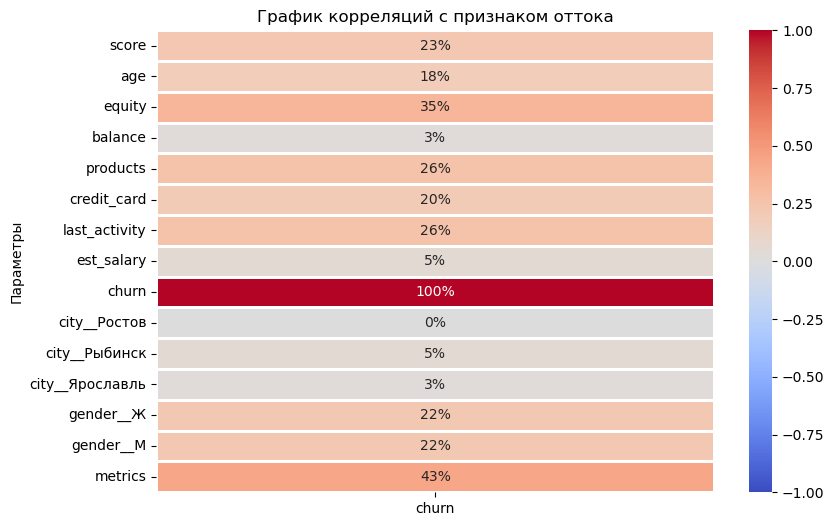

In [69]:
# Строим тепловую карту по корреляционную матрицу только по показателю оттока

plt.figure(figsize=(9, 6))
sns.heatmap(phik_overview[['churn']], annot = True, fmt='.0%', vmin=-1, vmax=1, center= 0,\
            cmap= 'coolwarm', linewidths=1)
plt.title('График корреляций с признаком оттока')
plt.ylabel('Параметры');

**Вывод:**

Для анализа корреляции показателей с оттоком используем шкалу Чеддока

**Корреляция Пирсона:**

умеренная связь прослеживается с: 

- количество продуктов, которыми пользуется клиент: 30%
- количество баллов собственности: 27%
- активность клиента за последний месяц: 17%
- мужской и женский пол одинаковый показатель: 14%
- баланс на счете: 13%
- наличие кредитной карты: 13%
- баллы кредитного скоринга: 11%

слабая связь прослеживается с:  

- возраст: 5%
- город Рыбинск: 3%
- город Ярославль: 2%
- город Ростов: 1%

**Корреляция Phik:**

заментная связь прослеживается с: 

- количество продуктов, которыми пользуется клиент: 44%
- количество баллов собственности: 35%

умеренная связь прослеживается с: 

- активность клиента за последний месяц: 26%
- баллы кредитного скоринга: 23%
- мужской и женский пол одинаковый показатель: 22%
- наличие кредитной карты: 20%
- возраст: 18%

слабая связь прослеживается с:  

- заработная плата: 5%
- город Рыбинск: 5%
- баланс на счете: 3%
- город Ярославль: 3%

## Проверка статистических гипотез

### Гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались

<a id="10-bullet"></a>

Сформулируем гипотезы. 

Нулевая: различий в доходе между лояльными и отточными клиентами нет. 

Альтернативная: различия в доходе между лояльными и отточными клиентами есть.

Для начала сформируем два датафрейма и найдем кол-во пользовтелей в них

In [70]:
df_0_raw = df.query('churn == 0')
print(df_0_raw.shape[0])

df_1_raw = df.query('churn == 1')
print(df_1_raw.shape[0])

# Найдем отношение кол-ва клиентов

round((df_0_raw.shape[0] / df_1_raw.shape[0]), 2)

8180
1819


4.5

Посмотрим на расспределение дохода в каждой группе


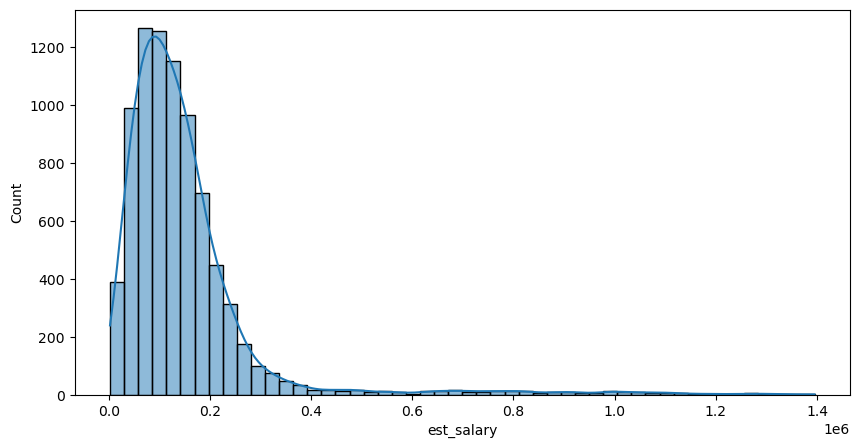

In [71]:
plt.figure(figsize=(10, 5))

sns.histplot(data=df_0_raw, x='est_salary', bins=50, kde=True);

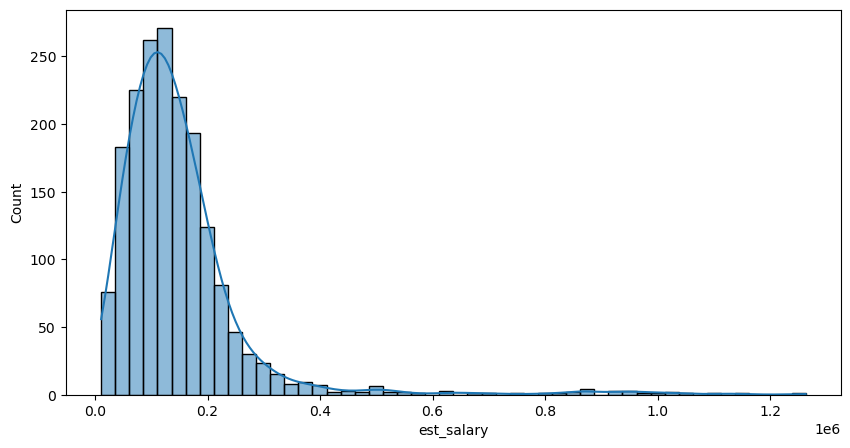

In [72]:
plt.figure(figsize=(10, 5))

sns.histplot(data=df_1_raw, x='est_salary', bins=50, kde=True);

Данное распределение отличается от нормального, выполним дополнительно проверку на нормальность данных тестом
проверка на нормальность критерием Шапиро-Уилка

In [73]:
# задаем критический уровень статистической значимости

alpha = 0.05  

results = st.shapiro(df_0_raw['est_salary'])
p_value = results[1]

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [74]:
alpha = 0.05  

results = st.shapiro(df_1_raw['est_salary'])
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Нашу гипотезу различия доходов будем проверять критерием на равенство средних двух генеральных совокупностей сначала параметрическим тестом Стьюдента, необходимо, чтобы соблюдались три аспекта: 

- Генеральные совокупности не должны зависеть друг от друга.

- Выборочные средние должны быть нормально распределены. 

Это условие не препятствие. Благодаря ЦПТ, если размер выборки составляет хотя бы несколько десятков значений, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности. Это утверждение верно, даже если сама генеральная совокупность не распределена нормально.

- Дисперсии рассматриваемых генеральных совокупностей должны быть равны.

Если выборки достаточно велики (30 и больше значений) и равны по размеру между собой, если нет, то параметр equal_var делаем равным False.

Итак, проверим на соответствие этим аспектам наши данные:

- Генеральные совокупности не зависят друг от друга
- Выборочные средние должны быть нормально распределены, хоть и по критерию Шапиро-Уилка мы установили, что сама совокупность не распределена нормально
- Дисперсии не равны, так как размеры отличаются в 4 раза, применим equal_var = False

In [75]:
# проведем тест с использованием метода st.ttest_ind()

results = st.ttest_ind(df_0_raw['est_salary'], df_1_raw['est_salary'], equal_var=False) 

alpha = 0.05  # alpha = задаем значение уровня значимости

print(results.pvalue) # вывод значения p-value на экран 

if results.pvalue < alpha : # условный оператор с выводом строки с ответом
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


0.8724727072323815
Не получилось отвергнуть нулевую гипотезу


Таким образом, при проверке у нас не получилось отвергнуть нулевую гипотезу о том, что различий в доходе между лояльными и отточными клиентами нет.

Теперь воспользуемся непараметрическим тестом Манна-Уитни, основанный на структурном подходе. Его применяют, когда в данных есть большие (по сравнению с нормальным распределением) выбросы. Главное отличие непараметрических методов в том, что они работают с рангами, никак не учитывая сами значения. Также сама величина может быть распределена ненормально.

In [76]:
# проведем тест с использованием метода st.mannwhitneyu()

#Установим уровень значимости 0.05 
alpha = 0.05

results = st.mannwhitneyu(df_0_raw['est_salary'], df_1_raw['est_salary'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  0.00021160652203623057
Отвергаем нулевую гипотезу: разница статистически значима


Таким образом, при проверке мы отвергаем нулевую гипотезу о том, что различий в доходе между лояльными и отточными клиентами нет.


Также дополнительно найдём относительные различия в доходах между группами

In [77]:
'{0:.3f}'.format(df_0_raw['est_salary'].mean()/df_1_raw['est_salary'].mean()-1)

'-0.004'

Теперь проведем тесты по заранее очищенным данным, которые делали в пунктах выше

In [78]:
# Сформируем два датафрейма

df_0 = df_hist.query('churn == 0')
print(df_0.shape[0])

df_1 = df_hist.query('churn == 1')
print(df_1.shape[0])

# Найдем отношение кол-ва клиентов

round((df_0.shape[0] / df_1.shape[0]), 2)

7578
1552


4.88

Выполним проверку гипотез по очищенным данным тестом Стьюдента

In [79]:
results = st.ttest_ind(df_0['est_salary'], df_1['est_salary'], equal_var=False)

alpha = 0.05  # alpha = задайте значение уровня значимости

print(results.pvalue) # вывод значения p-value на экран 

if results.pvalue < alpha : # условный оператор с выводом строки с ответом
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


0.8507011341633677
Не получилось отвергнуть нулевую гипотезу


Выполним проверку гипотез по очищенным данным тестом Манна-Уитни

In [80]:
#Установим уровень значимости 0.05 
alpha = 0.05

results = st.mannwhitneyu(df_0['est_salary'], df_1['est_salary'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  0.2561656216384428
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Также найдём относительные различия в дозодаз между группами

In [81]:
'{0:.3f}'.format(df_0['est_salary'].mean()/df_1['est_salary'].mean()-1)

'-0.003'

Таким образом, при проверке обоими тестами у нас не получилось отвергнуть нулевую гипотезу о том, что различий в доходе между лояльными и отточными клиентами нет.

В сравнении резултатов тестов по сырым и очищенным данным, тест Стьюдента показал одинаковый результат, а тест Манна-Уитни, отверг в первом случае нулевую гипотезу.

### Гипотеза различия между долями отточных и лояльных клиентов в городах

<a id="11-bullet"></a>

Мы хотим посмтореть доли отточных и лояльных клиентов относительно общего кол-ва по городам и выяснить есть ли разница между долями в разных городах или нет.

Сформулируем гипотезы: 
- Нулевая: между долями отточных и лояльных клиентов в городах нет стат значимой разницы. 
- Альтернативная: между долями отточных и лояльных клиентов в городах есть стат значимая разница.

Для этого сначала сформируем датафреймы по каждому городу

In [82]:
df_rostov = df.query('city__Ростов == 1')
df_rybinsk = df.query('city__Рыбинск == 1')
df_yaroslavl = df.query('city__Ярославль == 1')

In [83]:
# Создадим датафрейм, сгруппировав данные по оттоку, и посчитаем кол-во клиентов в каждой группе

df_rostov_cnt = df_rostov.groupby('churn', as_index=False)['city'].count()

# Найдем процент клиентов каждой группы от общего кол-ва

df_rostov_cnt['perc'] = round(df_rostov_cnt['city'] / df_rostov.shape[0] * 100, 2)

df_rostov_cnt

churn  city   perc
0      0  1151  81.23
1      1   266  18.77

In [84]:
# Создадим датафрейм, сгруппировав данные по оттоку, и посчитаем кол-во клиентов в каждой группе

df_rybinsk_cnt = df_rybinsk.groupby('churn', as_index=False)['city'].count()

# Найдем процент клиентов каждой группы от общего кол-ва

df_rybinsk_cnt['perc'] = round(df_rybinsk_cnt['city'] / df_rybinsk.shape[0] * 100, 2)

df_rybinsk_cnt

churn  city   perc
0      0  2258  83.82
1      1   436  16.18

In [85]:
# Создадим датафрейм, сгруппировав данные по оттоку, и посчитаем кол-во клиентов в каждой группе

df_yaroslavl_cnt = df_yaroslavl.groupby('churn', as_index=False)['city'].count()

# Найдем процент клиентов каждой группы от общего кол-ва

df_yaroslavl_cnt['perc'] = round(df_yaroslavl_cnt['city'] / df_yaroslavl.shape[0] * 100, 2)

df_yaroslavl_cnt

churn  city   perc
0      0  4771  81.03
1      1  1117  18.97

Чтобы удобно было проверять статистически значимое отличие между группами по отточности, создадим функцию на основе гипотезы о равенстве долей 

Название функции - `Ztest_t`

Парметры: 
- group_1 - первая выборка данных, 
- group_2 - вторая выборка данных, 
- alpha=0.05 - уровень значимости, установим по умолчанию

In [86]:
def Ztest_t(group_1, group_2, alpha=0.05):
    
    p1 = group_1['city'][1] / group_1['city'][0]
    
    p2 = group_2['city'][1] / group_2['city'][0]
    
    p_combined = (group_1['city'][1] + group_2['city'][1]) / (group_1['city'][0] + group_2['city'][0])

    
    diff = p1 - p2
    
    # Считаем статистику в стандартных отклонениях стандартного нормального распределения:

    z_value = diff / mth.sqrt(p_combined * (1 - p_combined) \
        * (1 / group_1['city'][0] + 1 / group_2['city'][0]))
    
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)

    distr = st.norm(0,1)
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

Так как мы рассматриваем проверки в рамках одного датасета. При каждой проверке какой-либо выборки из данных, мы увеличиваем вероятность получить ошибку. То есть мы проводим множественные сравнения, поэтому применим поправку Бонферрони, а именно поделим уровень значимости alpha на число проверок. Проведем тесты с поправкой.

In [87]:
#Зададим новое значение уровня значимости

alpha=0.05

bonferroni_alpha = alpha / 3  
bonferroni_alpha

0.016666666666666666

In [88]:
# Вызовем созданную функцию для городоа Ростов и Рыбинск

Ztest_t(df_rostov_cnt, df_rybinsk_cnt, alpha=bonferroni_alpha)

p-значение:  0.009445023197048208
Отвергаем нулевую гипотезу: между долями есть значимая разница


In [89]:
# Вызовем созданную функцию для городоа Ростов и Ярославль

Ztest_t(df_rostov_cnt, df_yaroslavl_cnt, alpha=bonferroni_alpha)

p-значение:  0.8279544199497897
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [90]:
# Вызовем созданную функцию для городоа Рыбинск и Ярославль

Ztest_t(df_rybinsk_cnt, df_yaroslavl_cnt, alpha=bonferroni_alpha)

p-значение:  0.00010802874598470069
Отвергаем нулевую гипотезу: между долями есть значимая разница


Таким образом, для городов Ростов и Ярославль у нас не получилось отвергнуть нулевую гипотезу о том, что между долями отточных и лояльных клиентов в городах нет стат значимой разницы.

И мы отвергаем нулевую гипотезу о том, что между долями отточных и лояльных клиентов для городов Рыбинск и Ярославль и для городов Ростов и Рыбинск нет стат значимой разницы.


## Сегментация

### Выделение сегментов

<a id="12-bullet"></a>

Для сегментации пользователей нам необходимо определить характеристики параметров и их приорететность. 

Ранее мы проводили корреляционный анализ, на основе которго будем определять какие характеристики стоит рассматривать в сегментах. Необходимо соеденить корреляцию по двум парамерам и рассчитать общую. Сначала возьмем значения из корреляции Пирсона. 

In [91]:
# Из df_corrr возьмем значения по отточности и удалим ненужные столбцы

ser_cor = round(df_corrr['churn'],2).drop(['churn', 'metrics'])

# Возьмем значения по модулю методом abs()

ser_cor = abs(ser_cor)

ser_cor

products           0.30
equity             0.27
last_activity      0.17
gender__М          0.14
balance            0.13
score              0.11
city__Ярославль    0.02
city__Ростов       0.01
est_salary         0.00
city__Рыбинск      0.03
age                0.05
credit_card        0.13
gender__Ж          0.14
Name: churn, dtype: float64

Теперь то же самое проделаем с корреляцией phik

In [92]:
# Из phik_overview возьмем значения по отточности и удалим ненужные столбцы

ser_phik = phik_overview['churn'].drop(['churn', 'metrics'])

ser_phik

score              0.23
age                0.18
equity             0.35
balance            0.03
products           0.26
credit_card        0.20
last_activity      0.26
est_salary         0.05
city__Ростов       0.00
city__Рыбинск      0.05
city__Ярославль    0.03
gender__Ж          0.22
gender__М          0.22
Name: churn, dtype: float64

In [93]:
# Объединим методом pd.concat()

data = pd.concat([ser_cor, ser_phik], axis=1)

# Просуммируем значения

data['sum'] = data.sum(axis=1)

# Отсортируем

data = data.sort_values('sum', ascending=False)
data 

churn  churn   sum
equity            0.27   0.35  0.62
products          0.30   0.26  0.56
last_activity     0.17   0.26  0.43
gender__М         0.14   0.22  0.36
gender__Ж         0.14   0.22  0.36
score             0.11   0.23  0.34
credit_card       0.13   0.20  0.33
age               0.05   0.18  0.23
balance           0.13   0.03  0.16
city__Рыбинск     0.03   0.05  0.08
city__Ярославль   0.02   0.03  0.05
est_salary        0.00   0.05  0.05
city__Ростов      0.01   0.00  0.01

Из сравнения портретов `df_merge` клиентов возьмем необходимые проценты `perc_mean` и `perc_median`, создадим список с нужными значениями и создадим новый столбец

In [94]:
#Создаем новый столбец

data['perc'] = [0.26, 0.37, 0.31, 0.28, 0.52, 0.02, 0.28, 0.02, 0.6, 0.15, 0.05, 0.06, 0.04]

# Просуммируем значения

data['value'] = data[['sum', 'perc']].sum(axis=1)

# Отсортируем

data = data.sort_values('value', ascending=False)

data 

churn  churn   sum  perc  value
products          0.30   0.26  0.56  0.37   0.93
equity            0.27   0.35  0.62  0.26   0.88
gender__Ж         0.14   0.22  0.36  0.52   0.88
balance           0.13   0.03  0.16  0.60   0.76
last_activity     0.17   0.26  0.43  0.31   0.74
gender__М         0.14   0.22  0.36  0.28   0.64
credit_card       0.13   0.20  0.33  0.28   0.61
score             0.11   0.23  0.34  0.02   0.36
age               0.05   0.18  0.23  0.02   0.25
city__Рыбинск     0.03   0.05  0.08  0.15   0.23
est_salary        0.00   0.05  0.05  0.06   0.11
city__Ярославль   0.02   0.03  0.05  0.05   0.10
city__Ростов      0.01   0.00  0.01  0.04   0.05

Для выделения сегментов создадим функцию, которая будет осуществлять срез данных, группировать  по отточности, считать процент и выводить нужные показатели `segment` с парметром `query`, куда будем передавать срез данных.

In [95]:
def segment(query):
    
    # Делаем срез данных
    
    df_seg = df.query(query)
    
    # Создаем новый датафрейм сгруппированный по отточности и считаем кол-во клиентов в каждой группе
    
    df_seg_2 = df_seg.groupby('churn', as_index=False)['churn'].count()
    
    # Считаем процент каждой группы по отношению к общему кол-ву
    
    df_seg_2['perc'] = round(df_seg_2['churn'] / df_seg.shape[0] * 100, 2)
    
    print('Размер сегмента: {}'.format(df_seg.shape[0]))
    print('Процент отточных клиентов: {}'.format(df_seg_2.loc[1]['perc']))
    print('Показатель бизнес-метрики: {}'.format(round(df_seg['metrics'].median(), 2)))
    
    sns.histplot(data=df_seg, x='metrics', kde=True, alpha  = 0.3, bins=30)
    plt.show()

В срезах для сегментов будем основываться на портрете лояльного клиента, сравнении портретов и на корреляции.

Самая высокая зависимость проследивается от кол-ва продуктов, поэтому это будет первой характеристикой. В портрете лояльного клиента мы определили, что их должно быть не больше 3, вторая хар-ка количество баллов собственности - меньше 5. Разобьем это на две группы equity < 3 и на 3 <= equity < 5.

- Второй: сегмент будет по неактивным женщинам и возрасту от 35 до 50 лет

- Третий: неактивных клиентах страше 60 лет

- четвертый: женщины с кредиткой и количеством баллов собственности меньше 3

- пятый: неактивные клиенты с кредиткой  от 35 до 50 лет и кол-вом продуктов не больше 3

'products <= 3 and equity < 3'

'products <= 3 and 3 <= equity < 5'

'gender__Ж == 1 and last_activity ==0 and 35 < age < 50'

'last_activity ==0 and age > 60'

'gender__Ж == 1 and credit_card ==1 and equity < 3'

'products <= 3 and credit_card == 1 and last_activity ==0 and 35 < age < 50'

Вызовем функцию `segment` в цикле по сформированным сегментам, которые передали в список. Размер сегмента оптимально должен быть от 300 до 3000, а процент отточности не больше 9%

Сегмент: products <= 3 and equity < 3
Размер сегмента: 4357
Процент отточных клиентов: 7.21
Показатель бизнес-метрики: 23.82


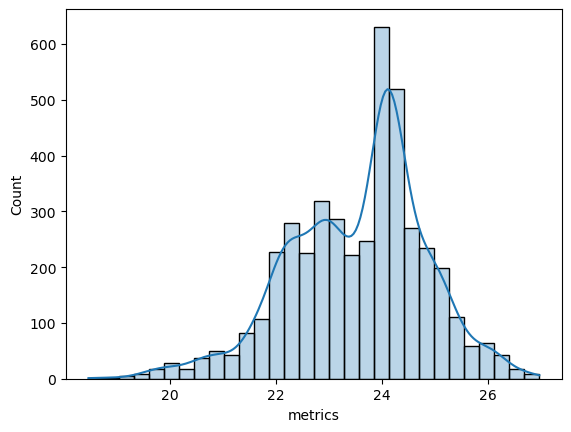

Сегмент: products <= 3 and 3 <= equity < 5
Размер сегмента: 3185
Процент отточных клиентов: 20.6
Показатель бизнес-метрики: 22.23


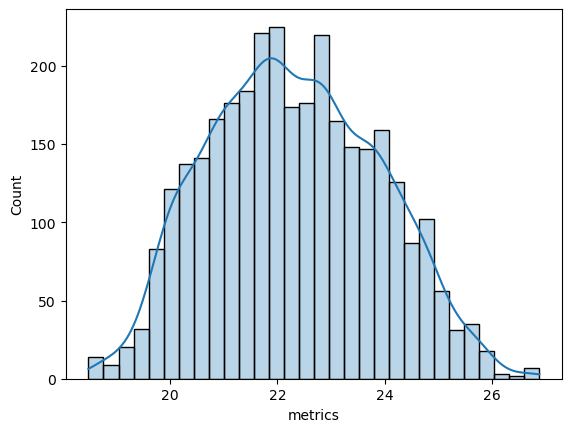

Сегмент: gender__Ж == 1 and last_activity ==0 and 35 < age < 50
Размер сегмента: 892
Процент отточных клиентов: 3.59
Показатель бизнес-метрики: 22.29


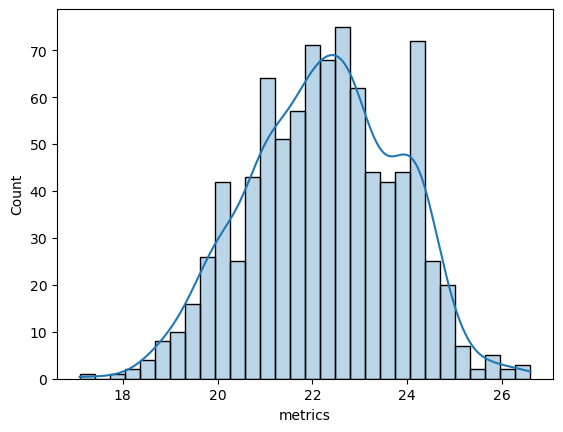

Сегмент: last_activity ==0 and age > 60
Размер сегмента: 454
Процент отточных клиентов: 6.17
Показатель бизнес-метрики: 23.09


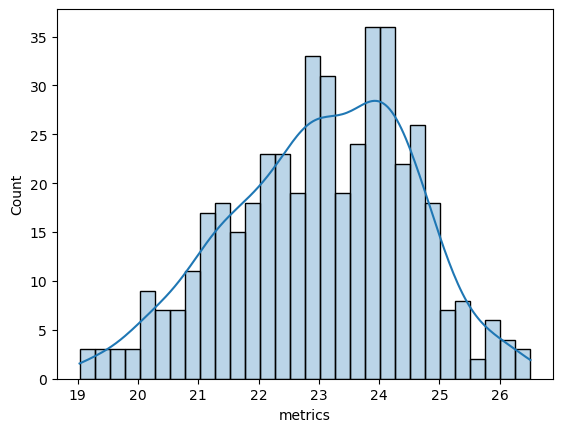

Сегмент: gender__Ж == 1 and credit_card ==1 and equity < 3
Размер сегмента: 1501
Процент отточных клиентов: 4.2
Показатель бизнес-метрики: 24.05


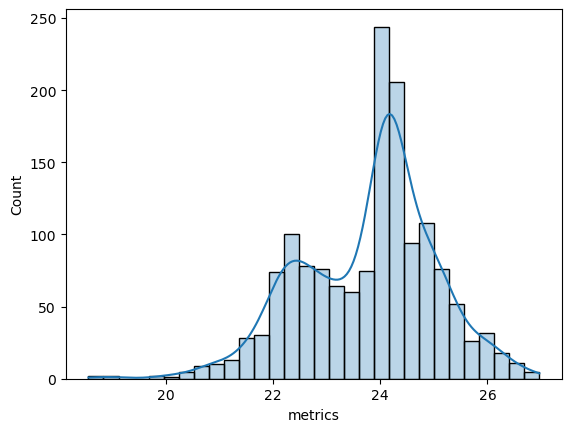

Сегмент: products <= 3 and credit_card == 1 and last_activity ==0 and 35 < age < 50
Размер сегмента: 1337
Процент отточных клиентов: 7.78
Показатель бизнес-метрики: 22.66


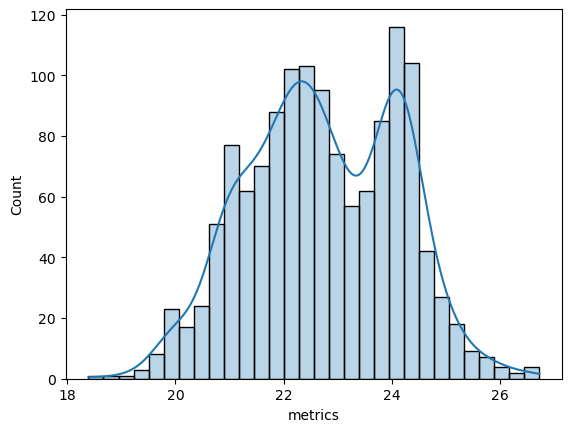

In [96]:
for i in ['products <= 3 and equity < 3',
          'products <= 3 and 3 <= equity < 5',
          'gender__Ж == 1 and last_activity ==0 and 35 < age < 50',
          'last_activity ==0 and age > 60',
          'gender__Ж == 1 and credit_card ==1 and equity < 3',
          'products <= 3 and credit_card == 1 and last_activity ==0 and 35 < age < 50']:
    print('Сегмент: {}'.format(i))
    segment(i)

По полученным данным видно, что у сегмента` products <= 3 and 3 <= equity < 5` слишклм большой процент отточных клиентов, поэтому исключаем его из рассмотрения.

Также можно заметить, что слишком большой размер сегмента `products <= 3 and equity < 3`, добавим еще одну характеристику - женщины, и вызовем функцию еще раз

Размер сегмента: 2115
Процент отточных клиентов: 5.53
Показатель бизнес-метрики: 23.77


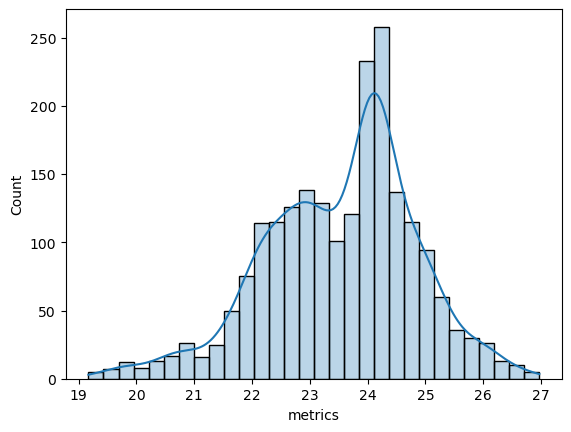

In [97]:
segment('products <= 3 and equity < 3 and gender__Ж == 1')

Приоритизируем сегменты относительно процента отточных клиентов, размера сегмента и показателя бизнес-метрики:

- 1 `Женшины с кредитной картой и кол-вом баллов собственности меньше 3`

Размер сегмента: 1501

Процент отточных клиентов: 4.2

Показатель бизнес-метрики: 24.05

- 2 `Женшины с кол-вом баллов собственности меньше 3 и кол-вом продуктов меньше или равно 3`

Размер сегмента: 2115

Процент отточных клиентов: 5.53

Показатель бизнес-метрики: 23.77

- 3 `Женшины в возрасте от 35 до 50 лет, которые в последний месяц не были активны`

Размер сегмента: 892

Процент отточных клиентов: 3.59

Показатель бизнес-метрики: 22.29

- 4 `Клиенты в возрасте от 35 до 50 лет с кредитной картой, кол-вом продуктов не больше 3`

Размер сегмента: 1337

Процент отточных клиентов: 7.78

Показатель бизнес-метрики: 22.66

- 5 `Клиенты в возрасте от 60 лет, которые в последний месяц не были активны`

Размер сегмента: 455

Процент отточных клиентов: 6.37

Показатель бизнес-метрики: 23.09


## Рекомендации заказчику

###  Рекомендации

<a id="13-bullet"></a>

Рекомендации для отдела маркетинга по рассылке информационных писем клиентам по сегментам:

- 1 `Женшины с кредитной картой и кол-вом баллов собственности меньше 3`

Можно предложить дополнительный кэшбек при использовании кредитки, акции у партнеров банка, также предложить больше дней без процентов

- 2 `Женшины с кол-вом баллов собственности меньше 3 и кол-вом продуктов меньше или равно 3`

Можно предложить акции у партнеров банка, также рассмотреть партнеров ориентированных на женские товары, бесплатное открытие кредитки и бесплатное годовое бесплатное, скидка на новый продукты банка

- 3 `Женшины в возрасте от 35 до 50 лет, которые в последний месяц не были активны`

Можно предложить удобную автоматизированную оплату ЖКХ, беспалтное открытие накопительного вклада с разным временем хранения средств, скидки в магазинах для держателей наших карт, ориентированные на соответствующий возраст, возможно товары для дома.

- 4 `Клиенты в возрасте от 35 до 50 лет с кредитной картой, кол-вом продуктов не больше 3`

Можно предложить сниженную ставку по ипотеке, увеличить лимит кредитки, а также предоставить скидки на детские мероприятия и скидки или кэшбек в магазинах-партнерах на товаров для школьников. 

- 5 `Клиенты в возрасте от 60 лет, которые в последний месяц не были активны`

Можно предложить открытие сберегательного счета, проведение оздоровительных мероприятий, скидки на аптечные товары.